## Análise dos dados de Multimodalidade em T
- Pegar os dados de cada classe e plotar as principais informações

In [2]:
path_to_data_folder = "diff_bc_video_(diffuser)/birdview/town01_multimodality_t_intersection_simples"

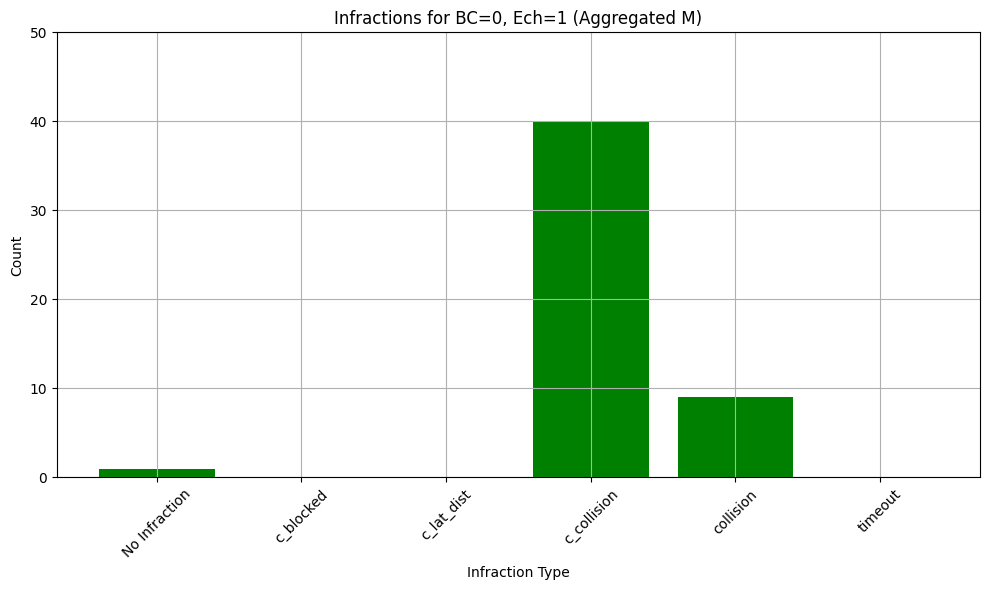

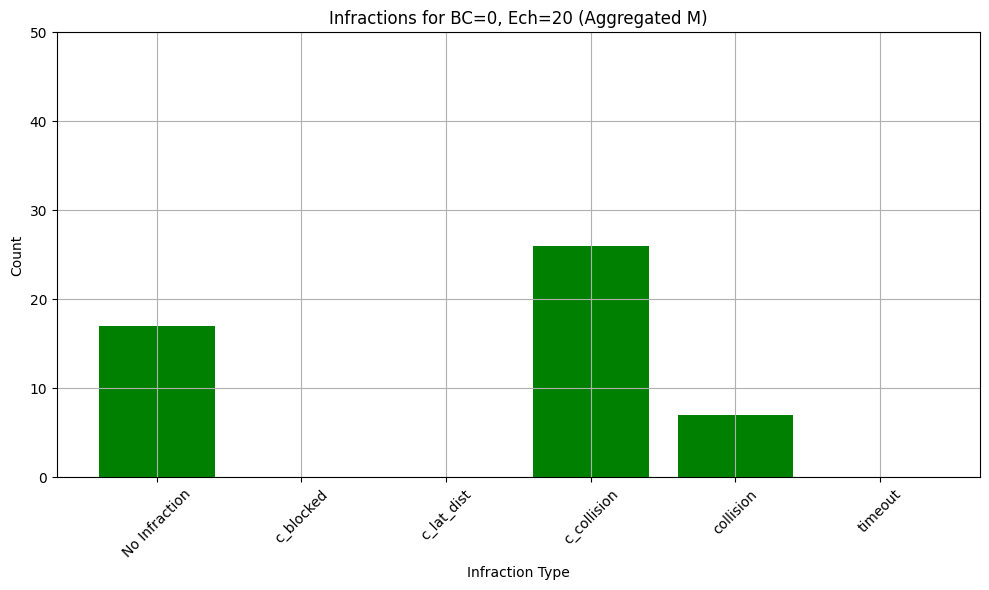

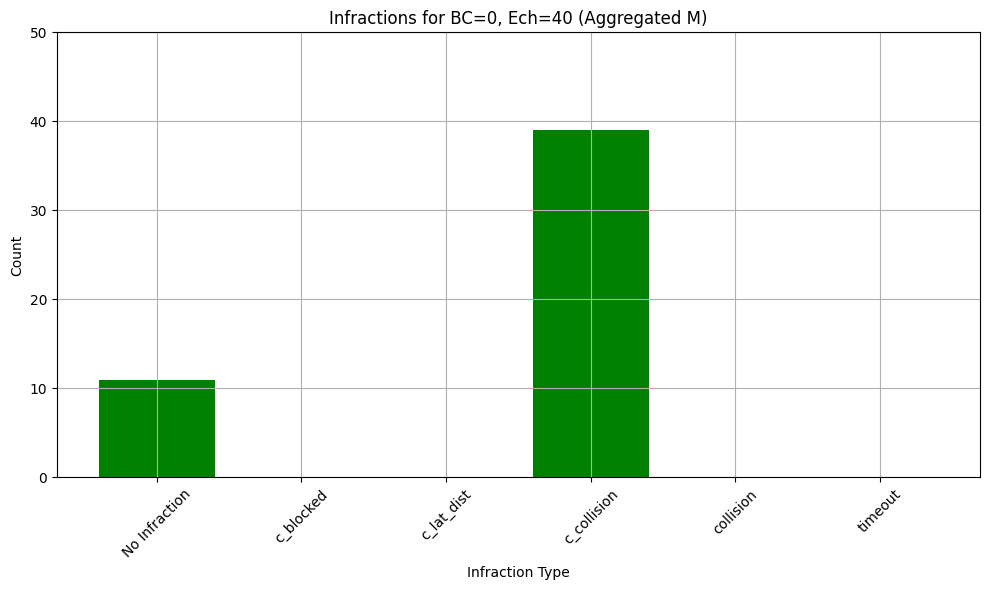

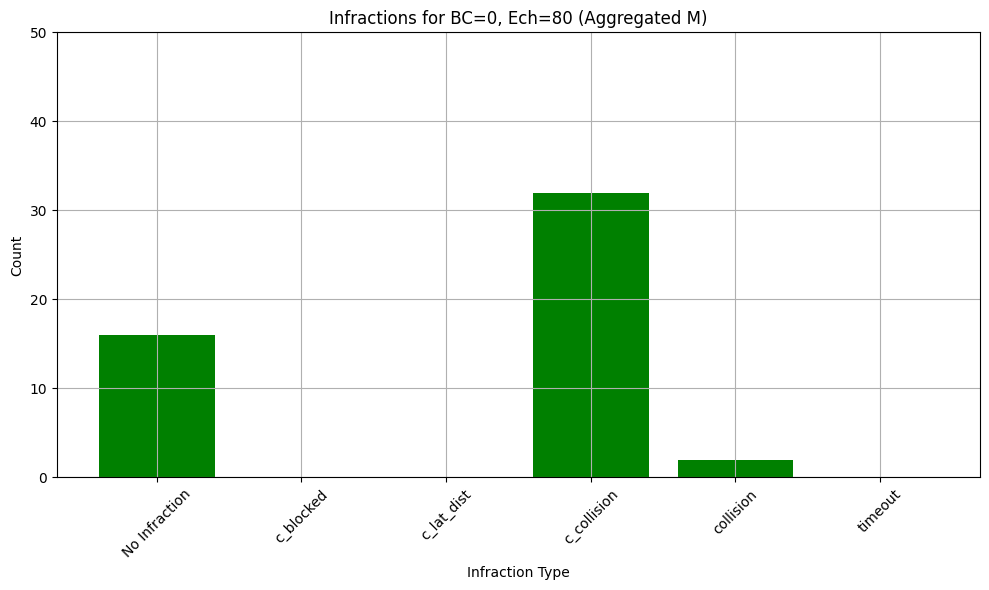

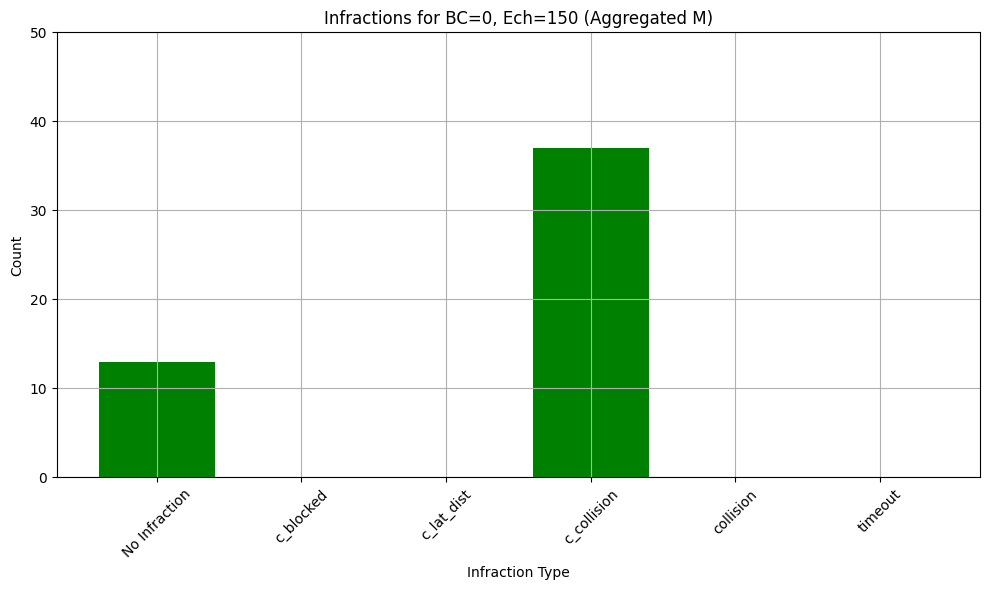

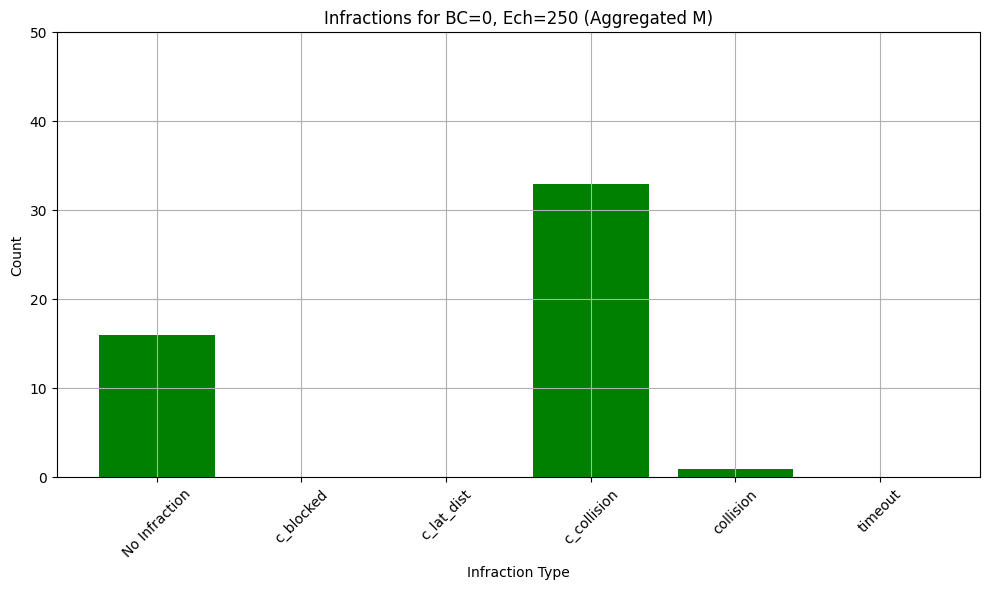

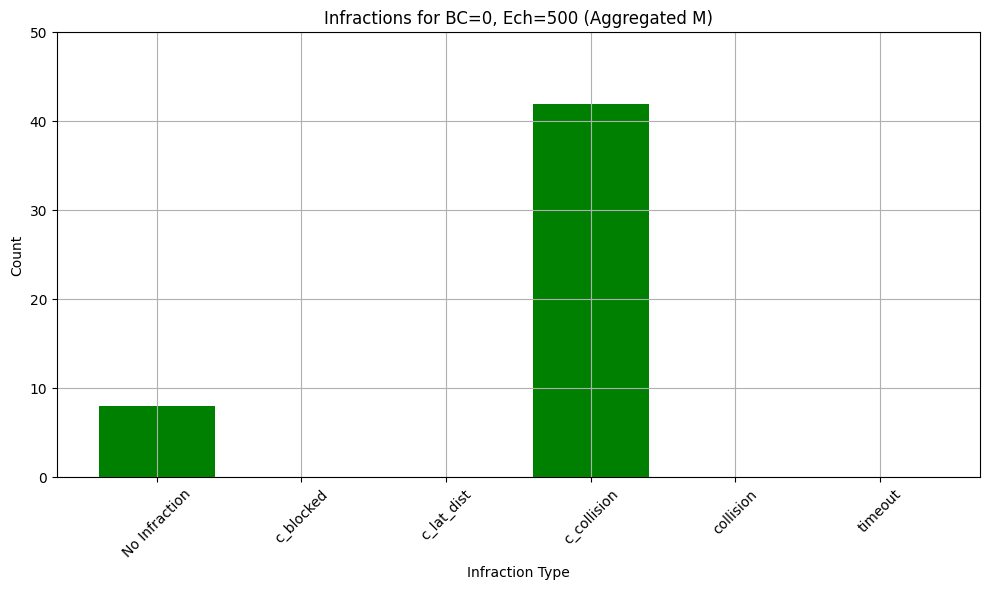

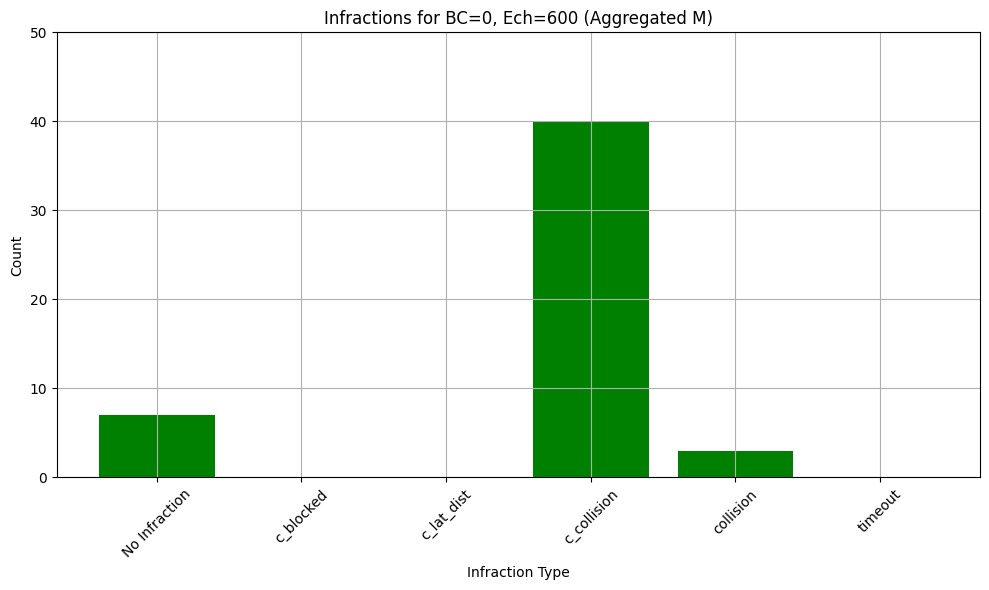

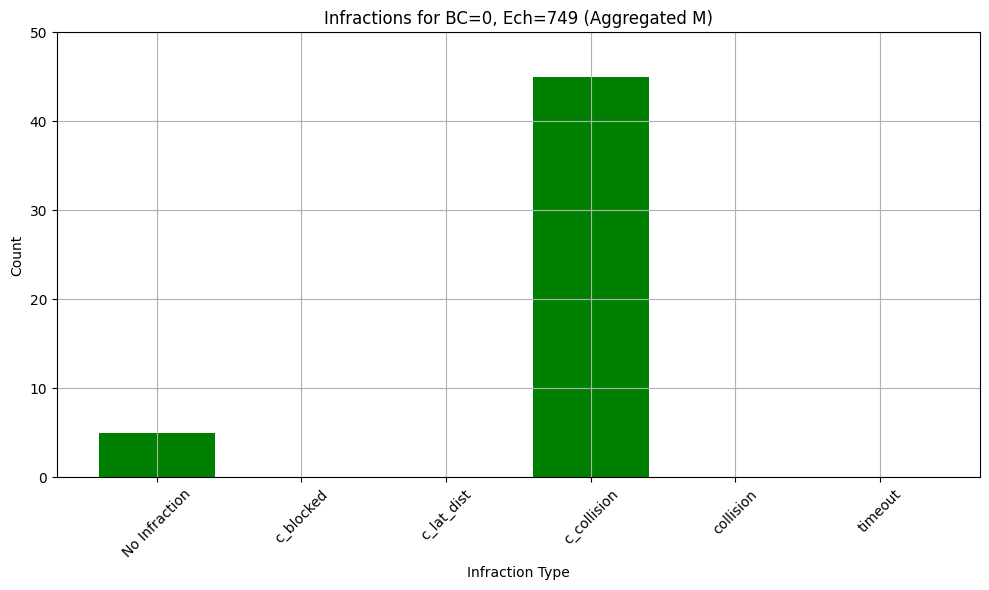

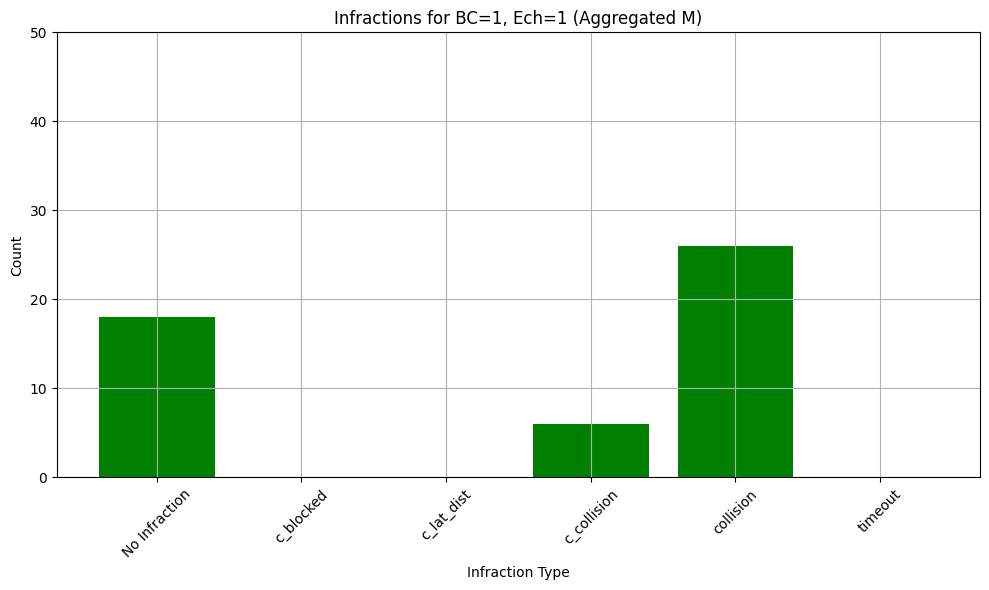

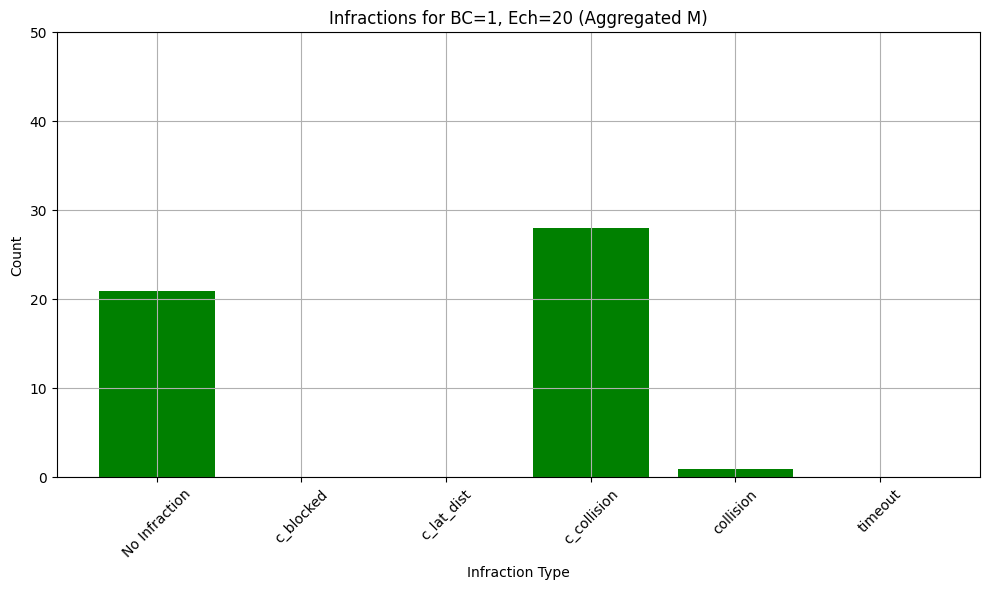

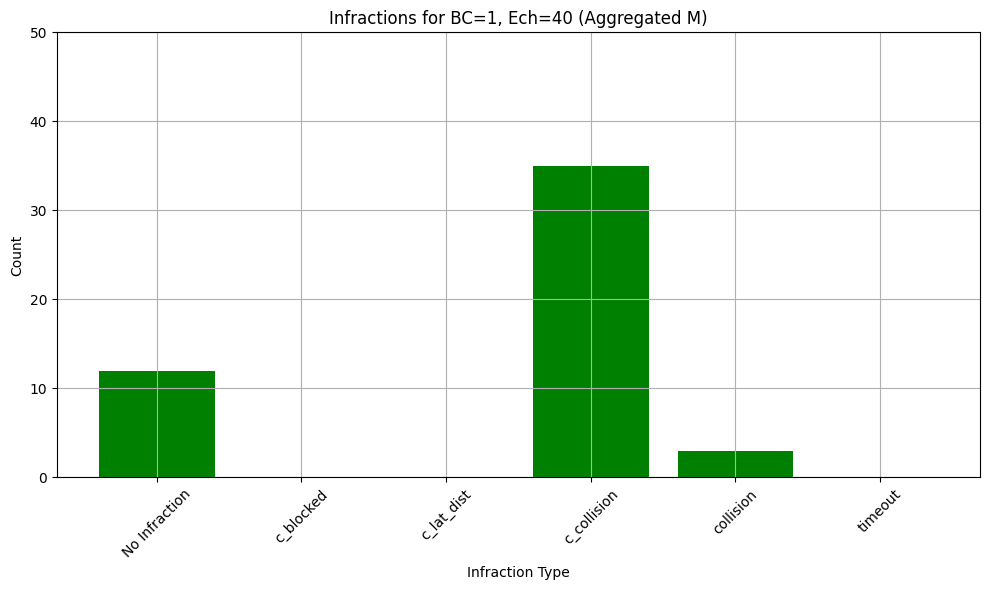

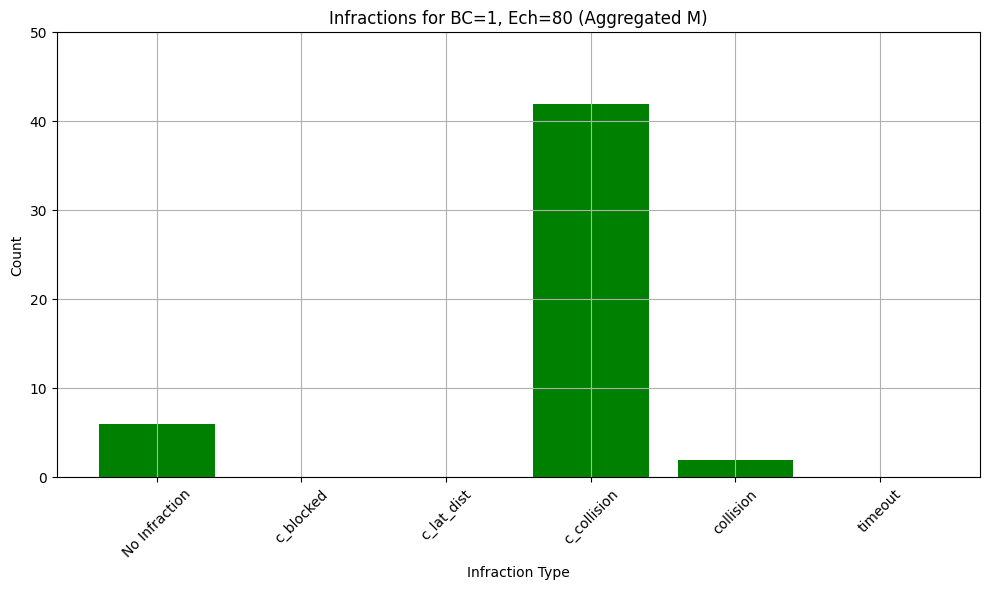

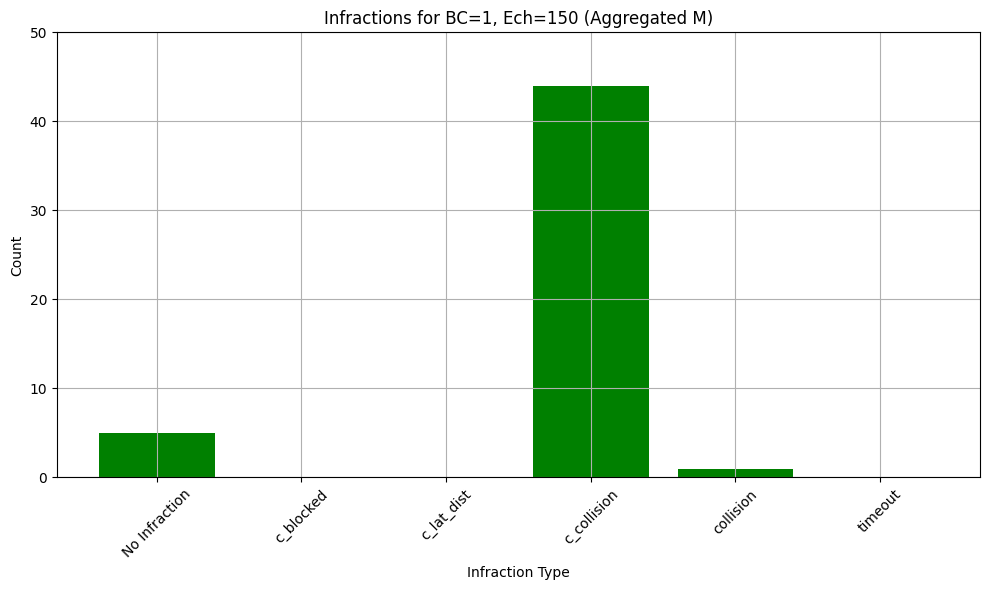

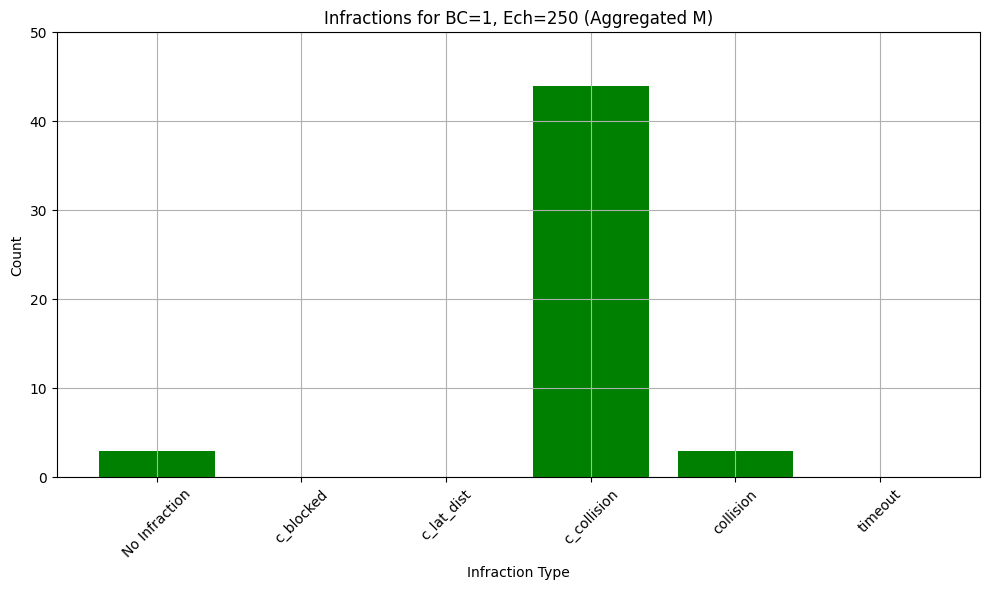

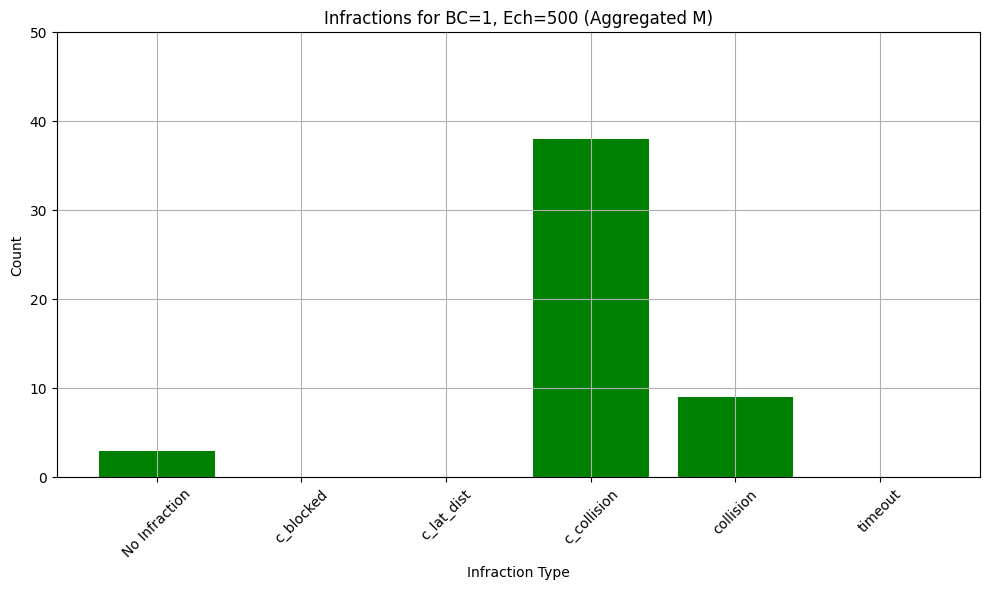

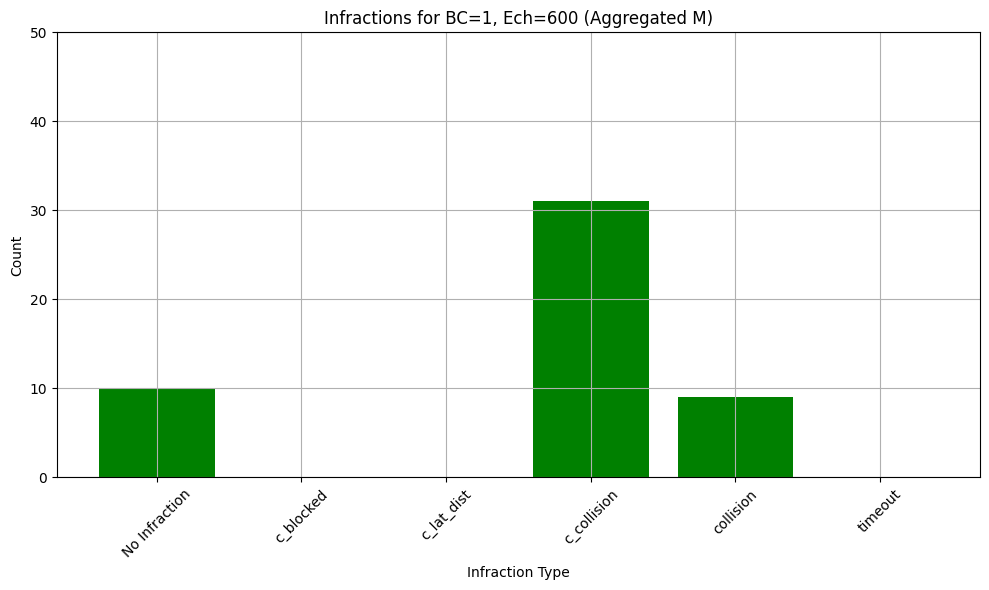

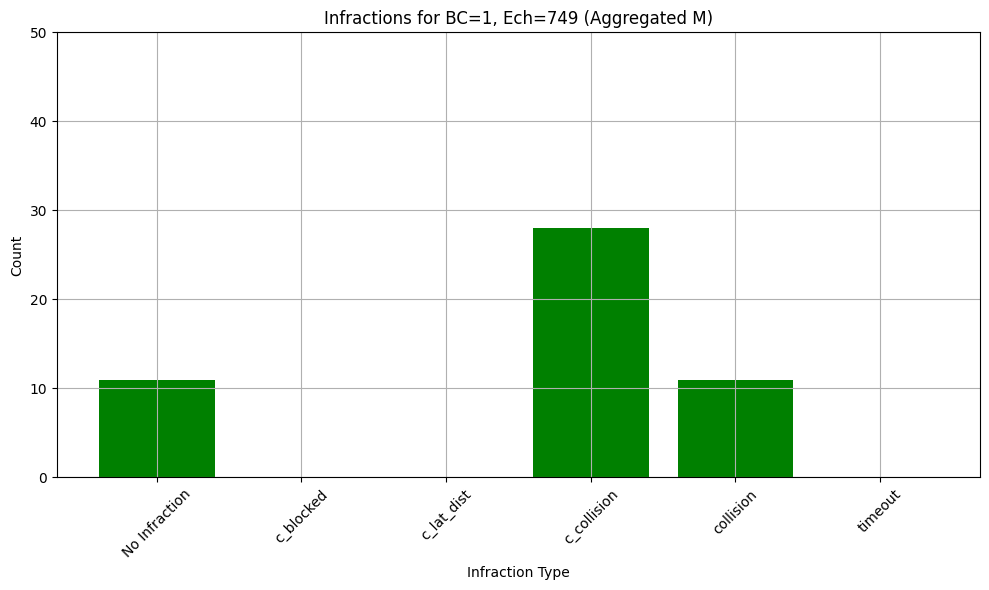

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Função para contar as infrações e plotar os histogramas por BC + Ech
def plot_histograms_by_bc_ech(data):
    # Dicionário para armazenar contagens de infrações por BC e Ech (agregando M)
    infraction_counts = defaultdict(lambda: defaultdict(int))
    
    for entry in data:
        BC, M, Ech, Ep, values = entry
        # Valores de infração
        is_route_completed = values[4]
        c_blocked = values[5]
        c_lat_dist = values[6]
        c_collision = values[7]
        collision = values[8]
        c_collision_px = values[9]
        timeout = values[10]

        # Verificar se é uma execução sem infração (todas falsas)
        c_blocked_sum = sum(c_blocked)
        c_lat_dist_sum = sum(c_lat_dist)
        c_collision_sum = sum(c_collision)
        collision_sum = sum(collision)
        c_collision_px_sum = sum(c_collision_px)
        timeout_sum = sum(timeout)
        # print(c_blocked)
        no_infraction = (timeout_sum+collision_sum+c_collision_sum+c_lat_dist_sum+c_blocked_sum) == 0
        
        # Agrupar por BC e Ech
        if no_infraction:
            infraction_counts[(BC, Ech)]['No Infraction'] += 1
        else:
            # Contar cada tipo de infração
            if c_blocked_sum:
                infraction_counts[(BC, Ech)]['c_blocked'] += 1
            elif c_lat_dist_sum:
                infraction_counts[(BC, Ech)]['c_lat_dist'] += 1
            elif c_collision_sum:
                infraction_counts[(BC, Ech)]['c_collision'] += 1
            elif collision_sum:
                infraction_counts[(BC, Ech)]['collision'] += 1
            elif timeout_sum:
                infraction_counts[(BC, Ech)]['timeout'] += 1

    # Ordenar os histogramas por BC e Ech
    sorted_keys = sorted(infraction_counts.keys())

    # Gerar os histogramas para cada combinação de BC e Ech
    for (BC, Ech) in sorted_keys:
        infractions = infraction_counts[(BC, Ech)]
        # Nome das infrações
        infraction_types = ['No Infraction', 'c_blocked', 'c_lat_dist',
                            'c_collision', 'collision', 'timeout']
        
        # Obter as contagens das infrações
        counts = [infractions[infraction] for infraction in infraction_types]

        # Plotar o histograma
        plt.figure(figsize=(10, 6))
        plt.bar(infraction_types, counts, color='g')
        plt.title(f'Infractions for BC={BC}, Ech={Ech} (Aggregated M)')
        plt.xlabel('Infraction Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.ylim([0,50])
        plt.tight_layout()
        plt.grid()
        plt.show()

# Especificar o caminho do arquivo .npy
path_to_data_folder = "diff_bc_video_(diffuser)/birdview/town01_multimodality_t_intersection_simples"
data = np.load(path_to_data_folder + '/data.npy', allow_pickle=True)

# Chamar a função para gerar os histogramas agregados por BC e Ech
plot_histograms_by_bc_ech(data)


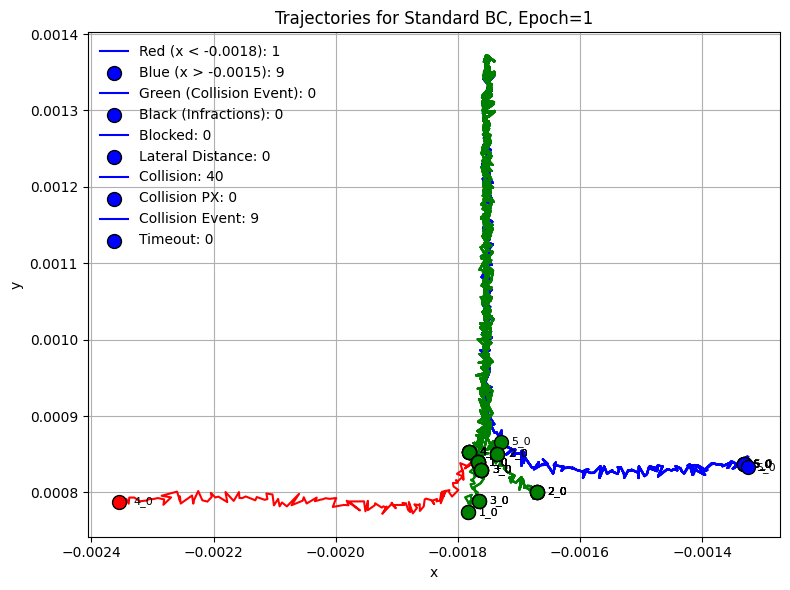

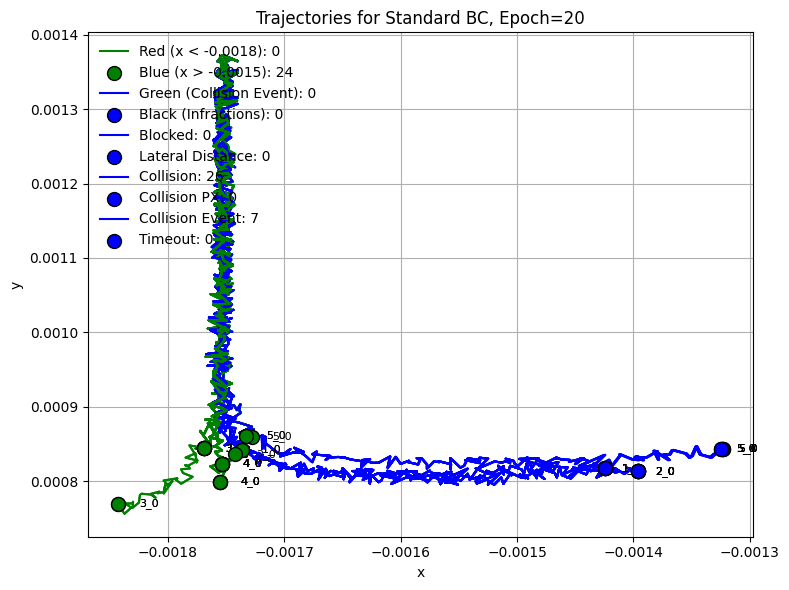

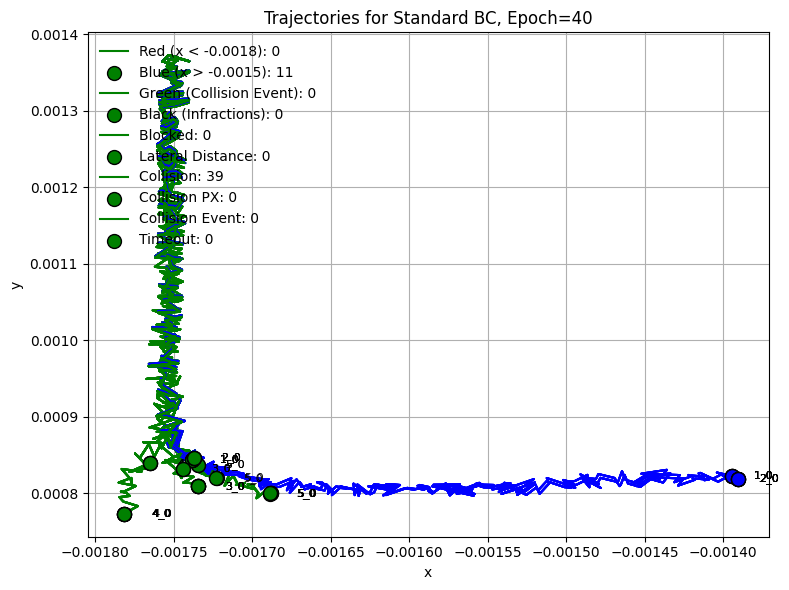

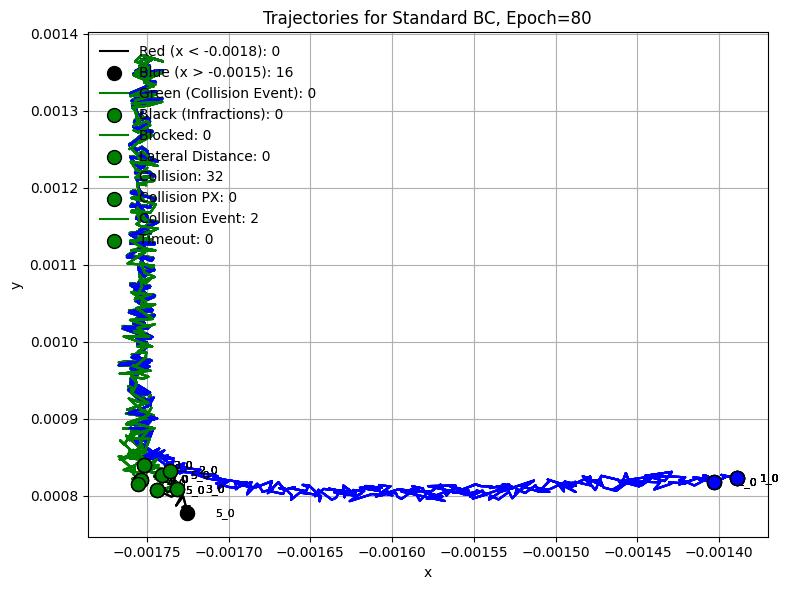

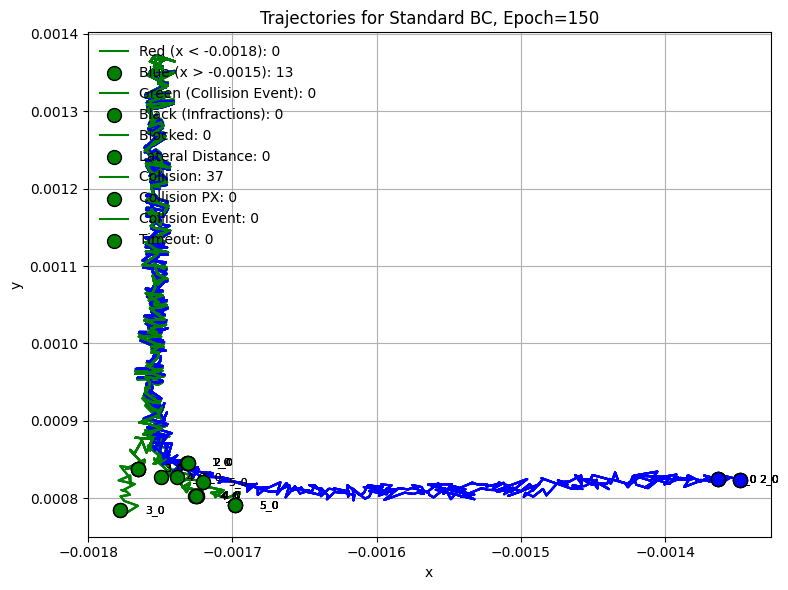

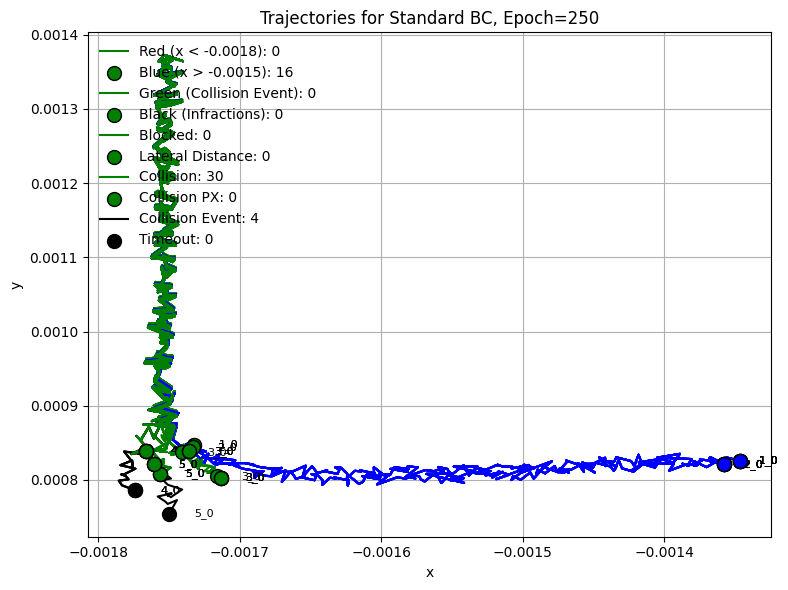

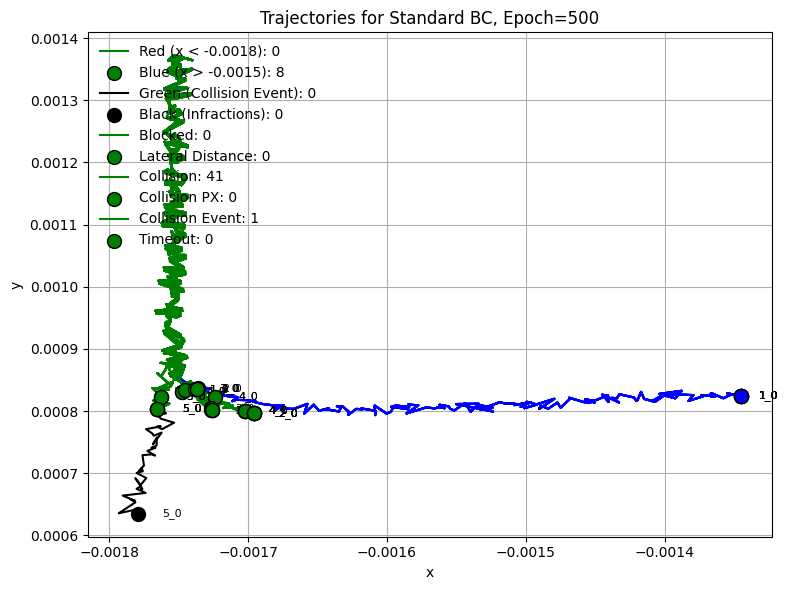

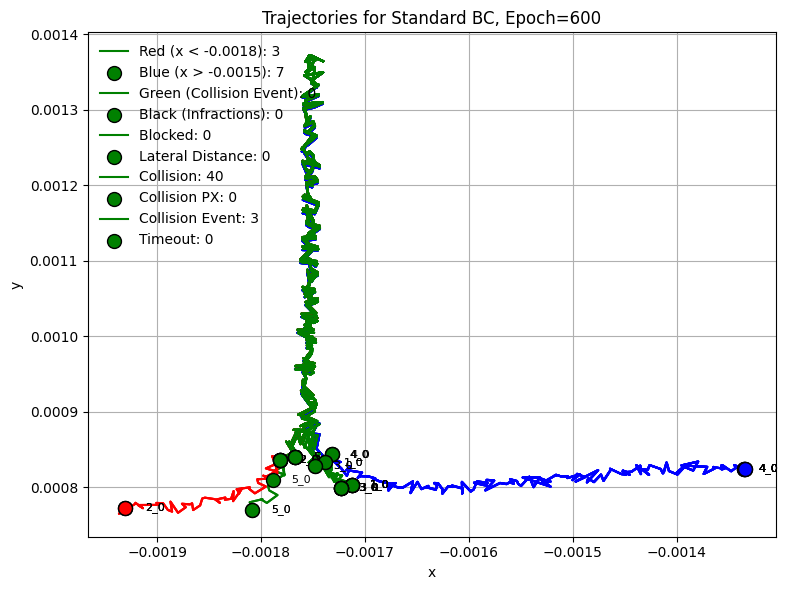

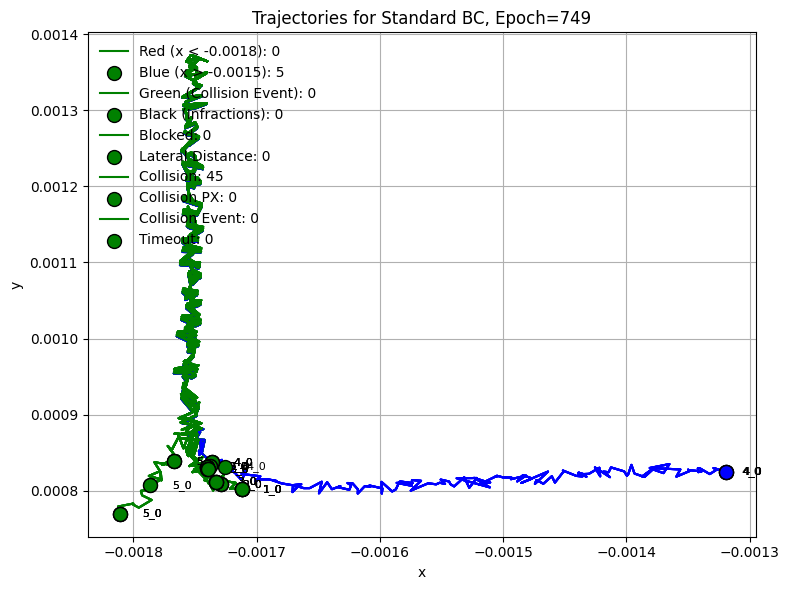

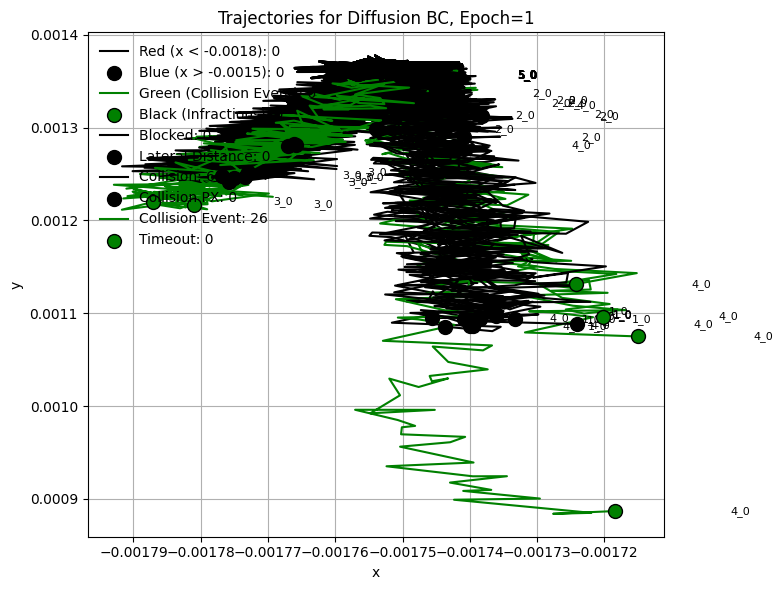

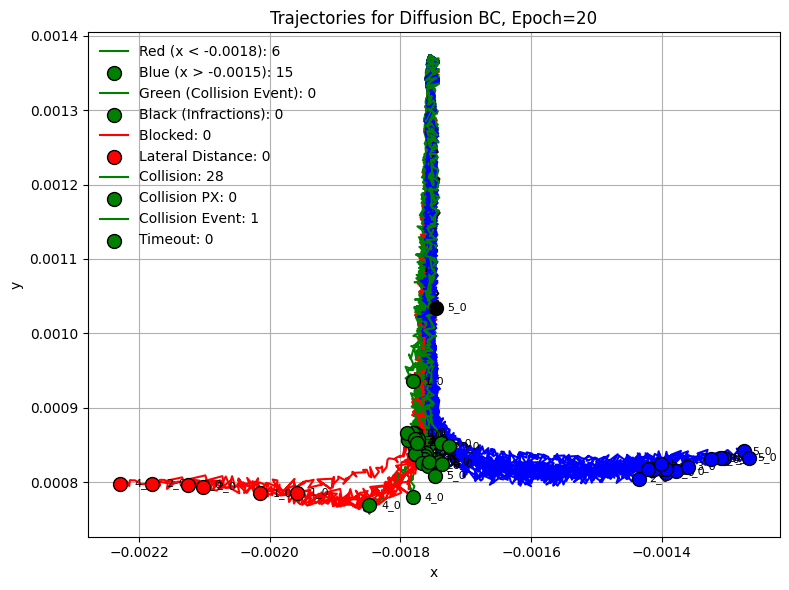

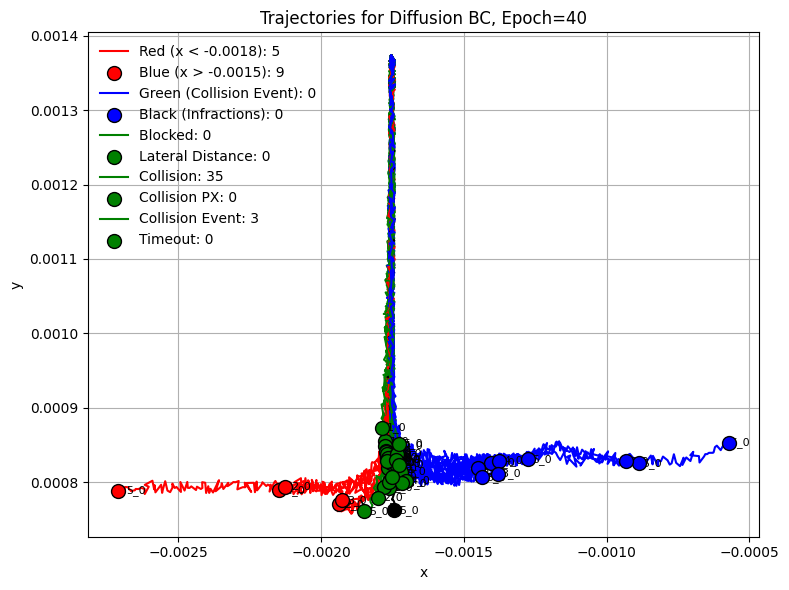

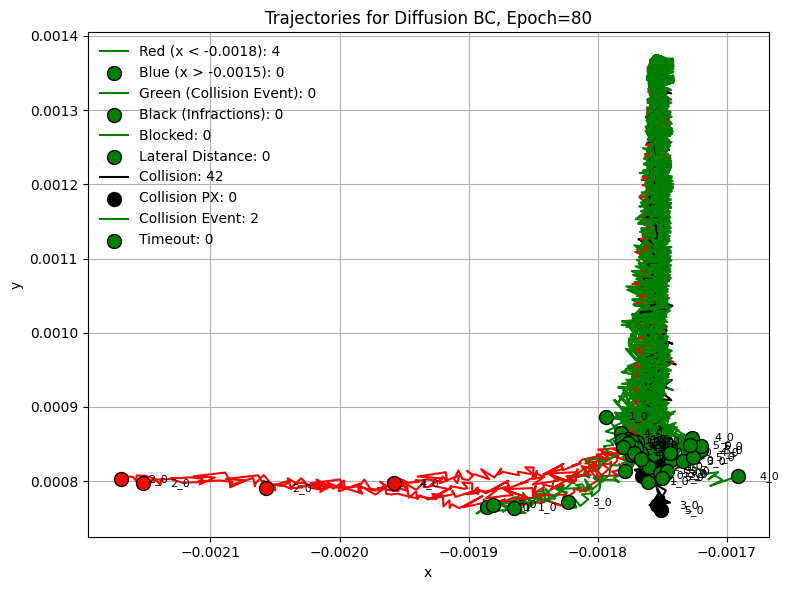

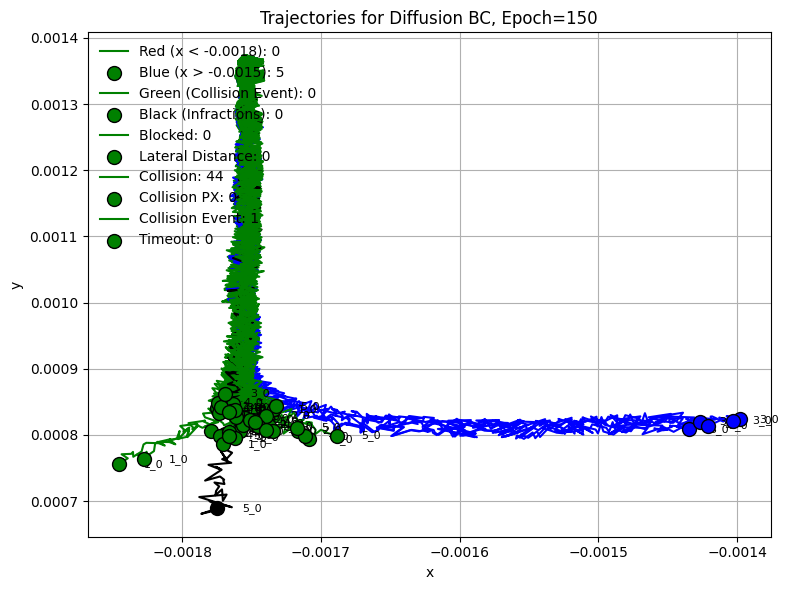

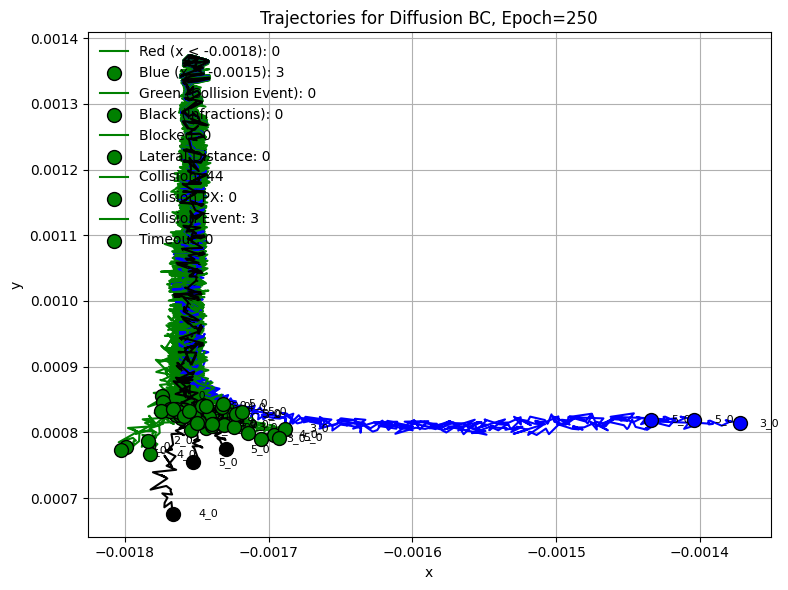

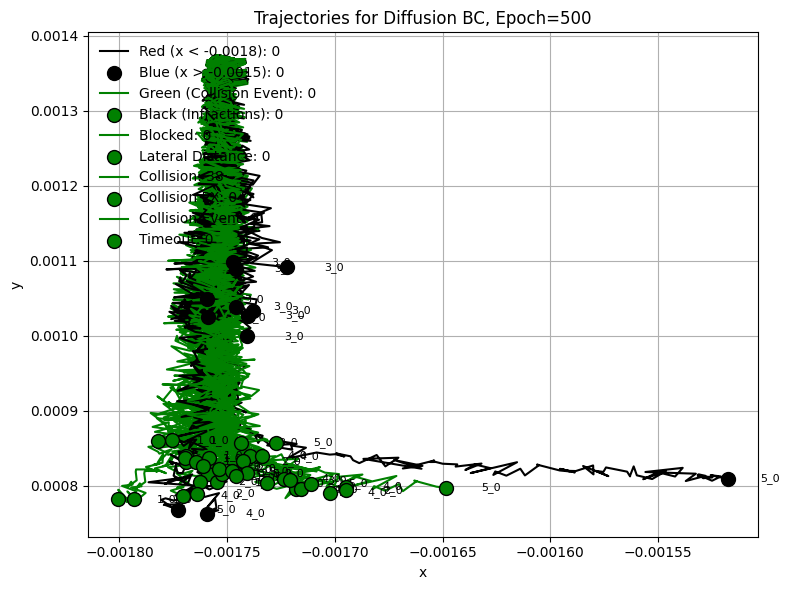

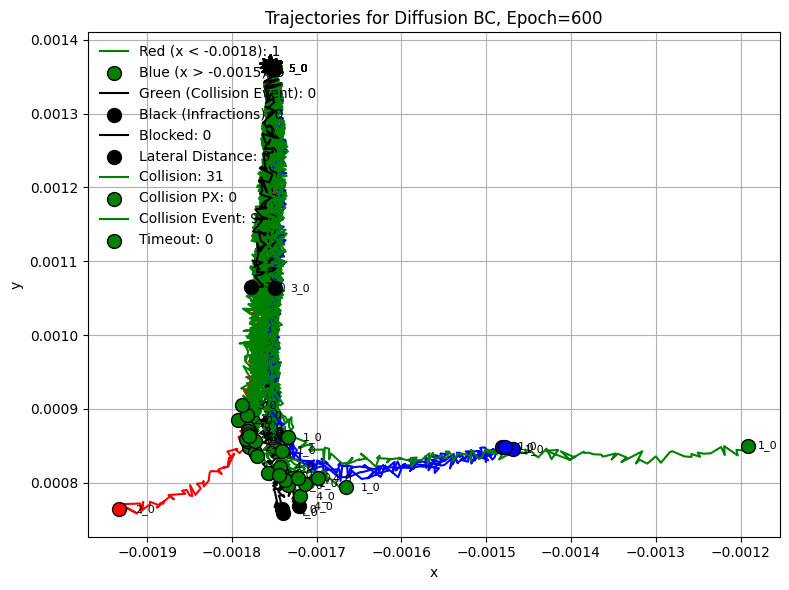

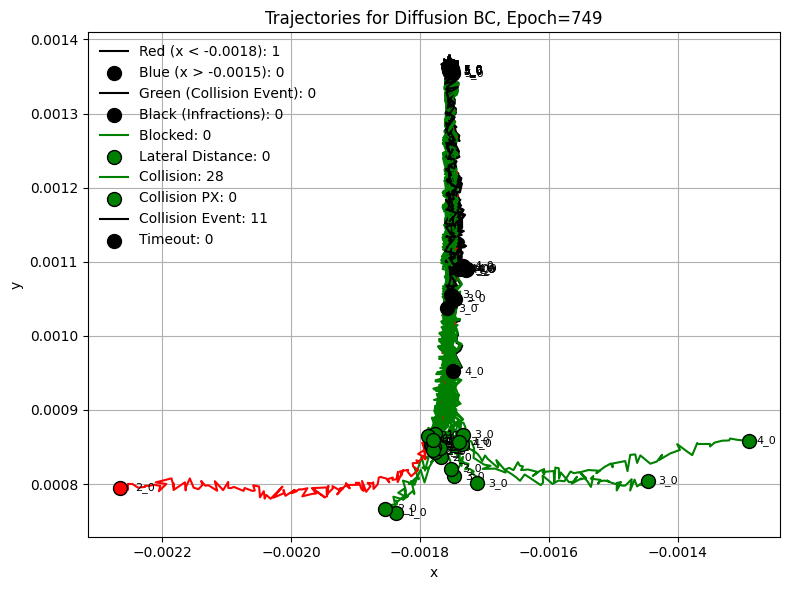

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Função para plotar trajetórias (x, y) agregadas por BC e Ech, interrompendo quando houver infração e marcando o último ponto
def plot_trajectories_by_bc_ech(data):
    # Dicionário para armazenar as trajetórias (x, y) por BC e Ech
    trajectories = defaultdict(lambda: defaultdict(list))

    # Percorrer os dados e agrupar as trajetórias por BC e Ech
    for entry in data:
        BC, M, Ech, Ep, values = entry
        x = values[0]  # x está na primeira coluna
        y = values[1]  # y está na segunda coluna
        
        # Variáveis para verificar infrações
        is_route_completed = values[4]
        c_blocked = values[5]
        c_lat_dist = values[6]
        c_collision = values[7]
        collision = values[8]
        c_collision_px = values[9]
        timeout = values[10]
        
        # Soma das infrações
        c_blocked_sum = sum(c_blocked)
        c_lat_dist_sum = sum(c_lat_dist)
        c_collision_sum = sum(c_collision)
        collision_sum = sum(collision)
        c_collision_px_sum = sum(c_collision_px)
        timeout_sum = sum(timeout)
        
        # Verificar se há infração
        no_infraction = (timeout_sum + collision_sum + c_collision_sum + c_lat_dist_sum + c_blocked_sum) == 0
        
        # Agregar trajetórias por BC e Ech
        trajectories[BC][Ech].append((x, y, no_infraction, c_blocked, c_lat_dist, c_collision, collision, c_collision_px, timeout, M))
    
    # Gerar os gráficos das trajetórias para cada combinação de BC e Ech, ordenados
    for BC in sorted(trajectories.keys()):  # Ordenar por BC
        for Ech in sorted(trajectories[BC].keys()):  # Ordenar por Ech
            plt.figure(figsize=(8, 6))
            
            # Contadores de trajetórias por cor
            red_count = 0
            blue_count = 0
            black_count = 0
            green_count = 0
            
            # Contadores de tipos de infração
            c_blocked_count = 0
            c_lat_dist_count = 0
            c_collision_count = 0
            collision_count = 0
            c_collision_px_count = 0
            timeout_count = 0
            
            for (x, y, no_infraction, c_blocked, c_lat_dist, c_collision, collision, c_collision_px, timeout, M) in trajectories[BC][Ech]:
                # Inicializar variável de cor e plot parcial
                plot_until_index = len(x)  # Por padrão, plota até o fim
                
                # Verificar se houve infração para definir a cor
                color = 'black'  # Padrão para preto
                collision_event = False
                
                # Verificar onde ocorre a primeira infração e parar de plotar ali
                for i in range(len(x)):
                    if (c_blocked[i] == 1 or c_lat_dist[i] == 1 or c_collision[i] == 1 or
                        collision[i] == 1 or c_collision_px[i] == 1 or timeout[i] == 1):
                        
                        # Incrementar contadores de infrações
                        if c_blocked[i] == 1:
                            c_blocked_count += 1
                        if c_lat_dist[i] == 1:
                            c_lat_dist_count += 1
                        if c_collision[i] == 1:
                            c_collision_count += 1
                            collision_event = True  # Indicar que ocorreu um evento de colisão
                        if collision[i] == 1:
                            collision_count += 1
                        if c_collision_px[i] == 1:
                            c_collision_px_count += 1
                        if timeout[i] == 1:
                            timeout_count += 1
                        
                        plot_until_index = i  # Parar a trajetória aqui
                        break  # Parar de verificar infrações
                
                if collision_event:
                    color = 'green'
                else:
                    last_x = x[plot_until_index - 1]
                    if last_x < -0.0018:
                        color = 'red'
                        red_count += 1
                    elif last_x > -0.0015:
                        color = 'blue'
                        blue_count += 1
                
                plt.plot(x[:plot_until_index], y[:plot_until_index], color=color)
                
                # Desenhar um círculo no último ponto plotado
                plt.scatter(x[plot_until_index - 1], y[plot_until_index - 1], color=color, edgecolor='k', s=100, zorder=5)
                
                # Adicionar o valor de M ao lado do último ponto
                plt.text(x[plot_until_index - 1]*0.99, y[plot_until_index - 1], f'{M}_{Ep}', fontsize=8, verticalalignment='center')

            if BC == 1:
                plt.title(f'Trajectories for Diffusion BC, Epoch={Ech}')
            else:
                plt.title(f'Trajectories for Standard BC, Epoch={Ech}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.grid(True)
            
            legend_labels = [
                f'Red (x < -0.0018): {red_count}',
                f'Blue (x > -0.0015): {blue_count}',
                f'Green (Collision Event): {green_count}',
                f'Black (Infractions): {black_count}',
                f'Blocked: {c_blocked_count}',
                f'Lateral Distance: {c_lat_dist_count}',
                f'Collision: {c_collision_count}',
                f'Collision PX: {c_collision_px_count}',
                f'Collision Event: {collision_count}',
                f'Timeout: {timeout_count}'
            ]
            plt.legend(legend_labels, loc='upper left', frameon=False)
            
            plt.tight_layout()
            plt.show()

path_to_data_folder = "diff_bc_video_(diffuser)/birdview/town01_multimodality_t_intersection_simples"
data = np.load(path_to_data_folder + '/data.npy', allow_pickle=True)

plot_trajectories_by_bc_ech(data)


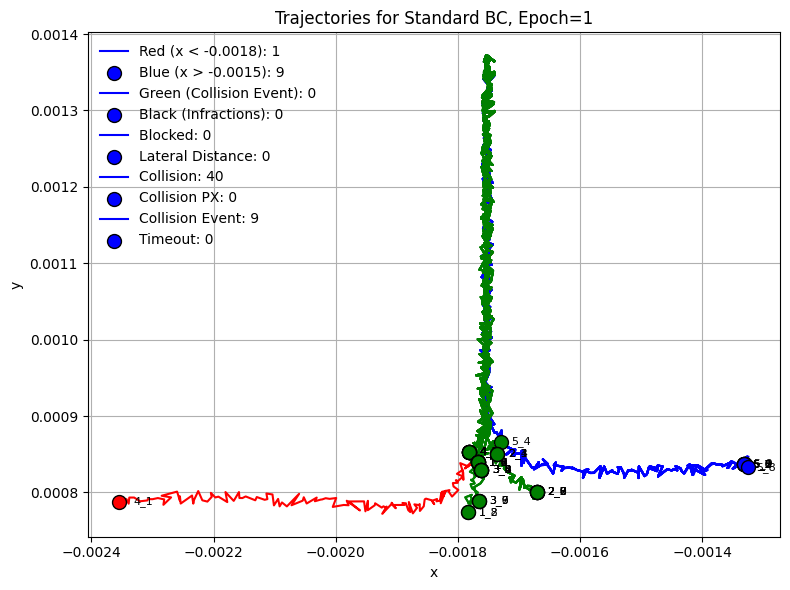

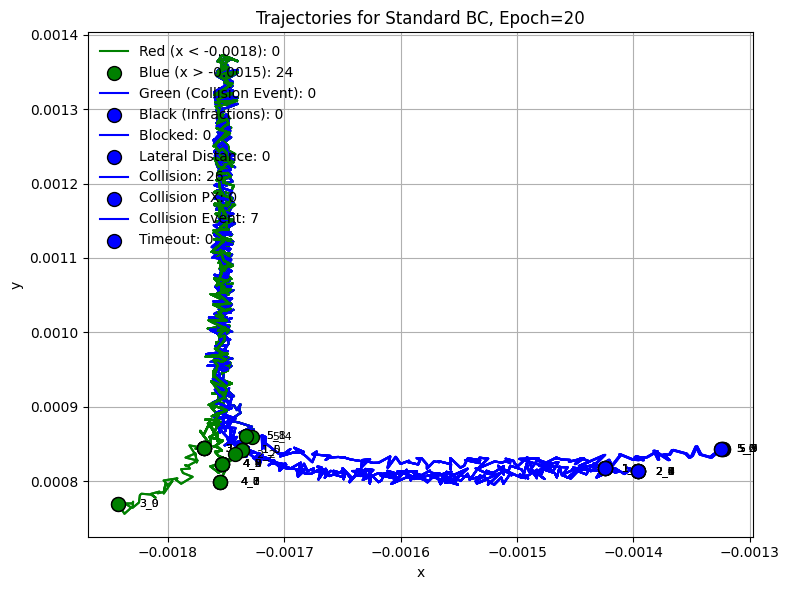

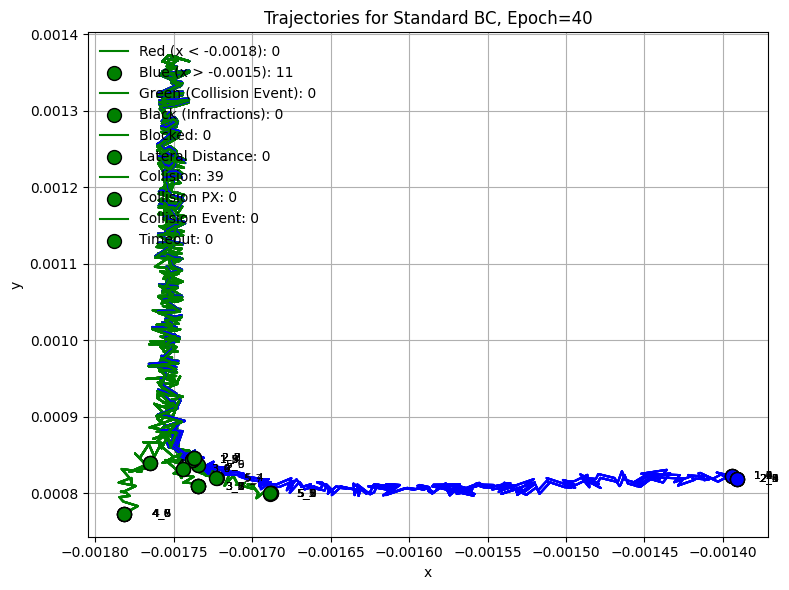

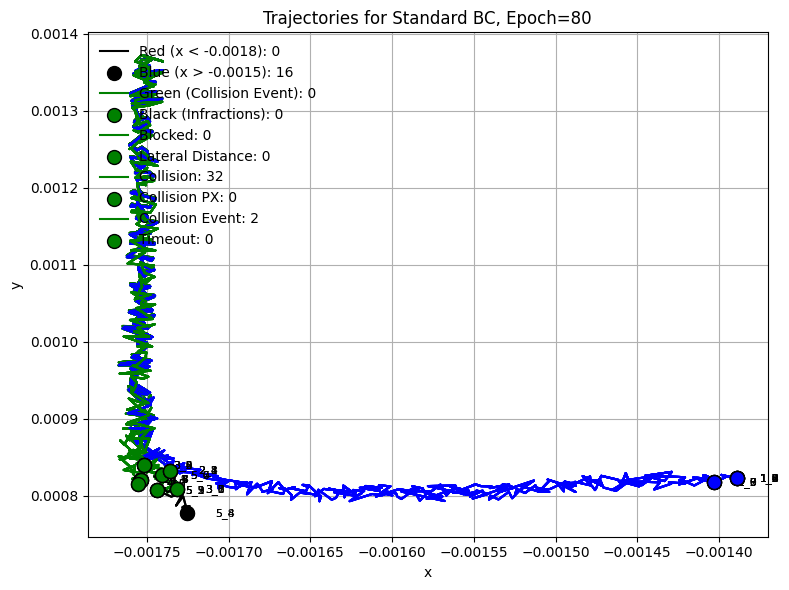

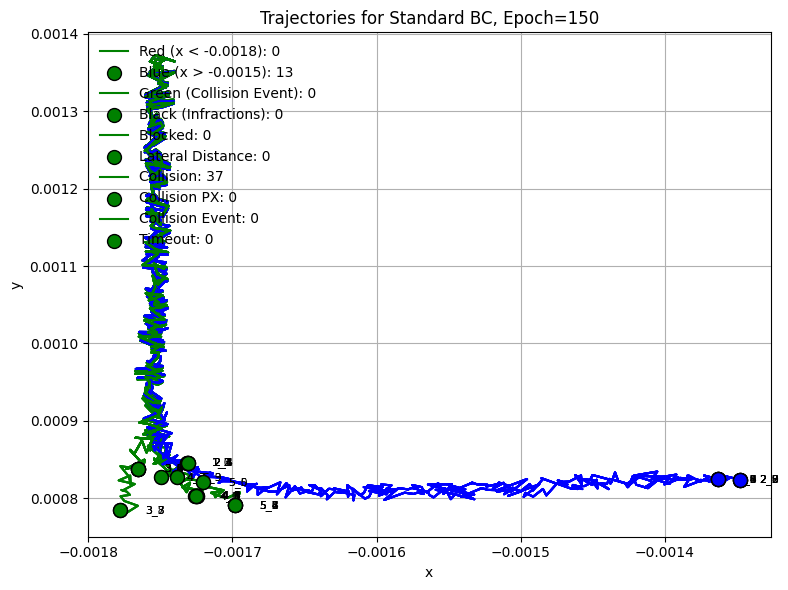

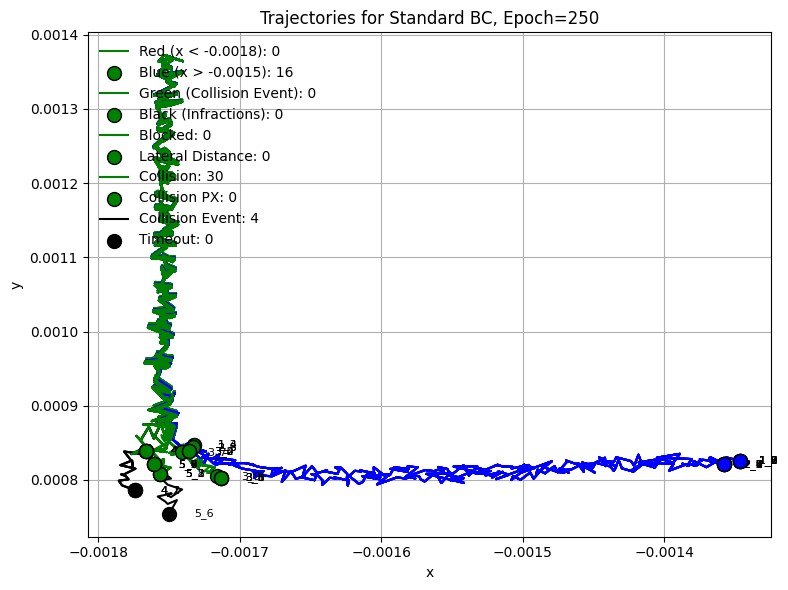

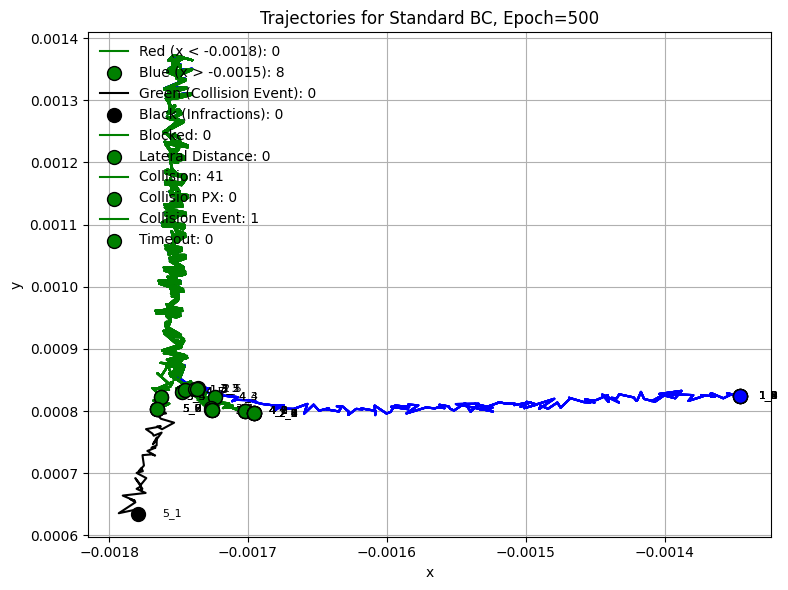

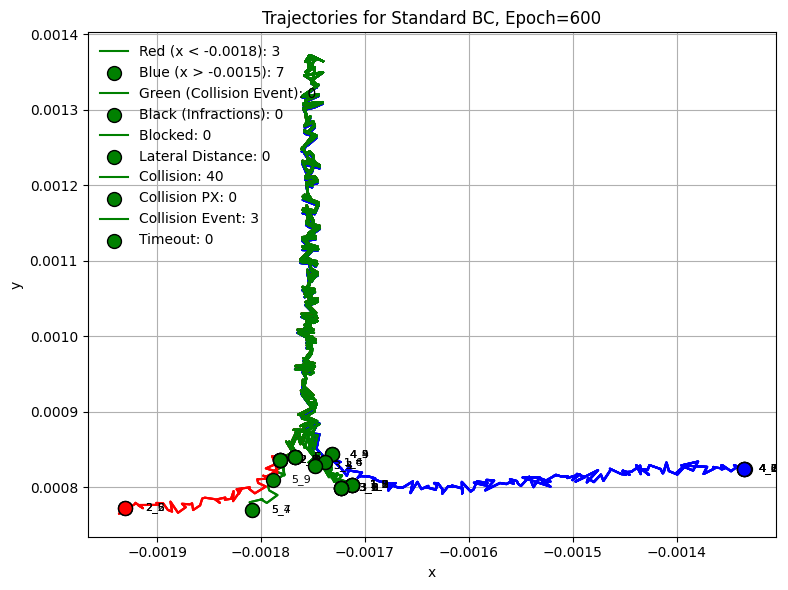

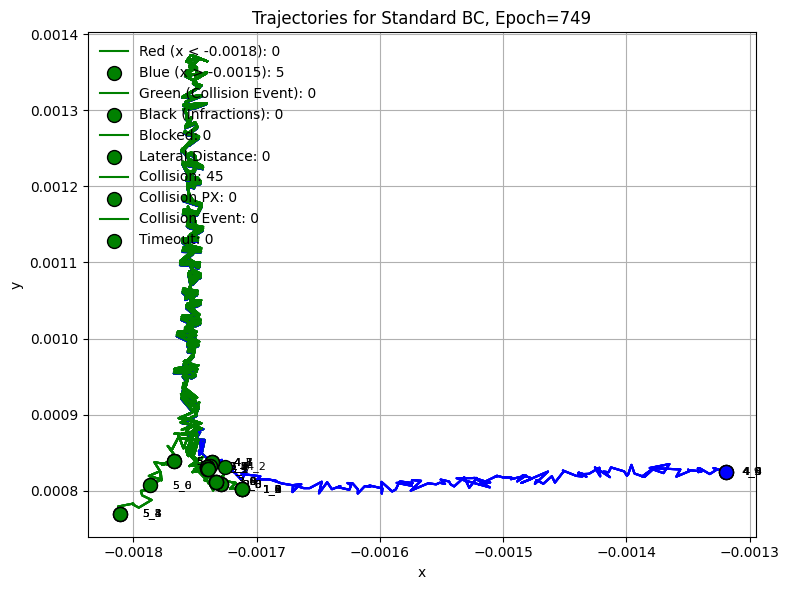

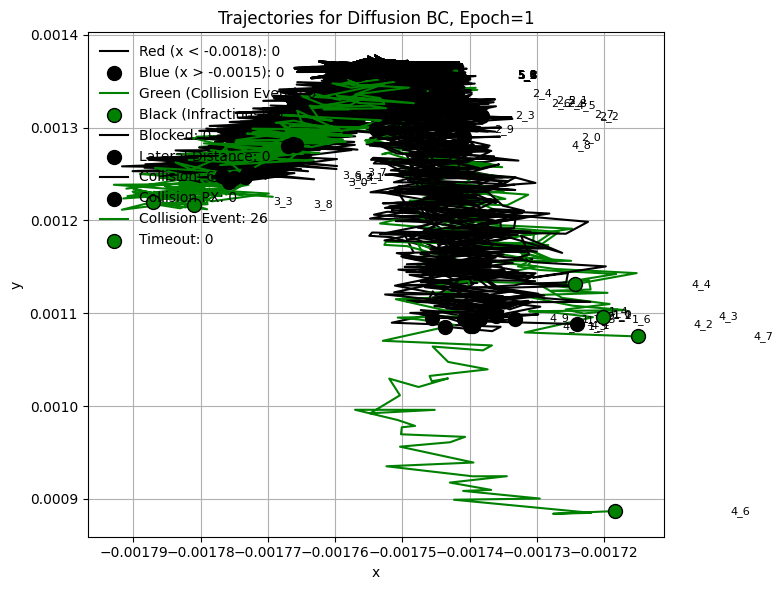

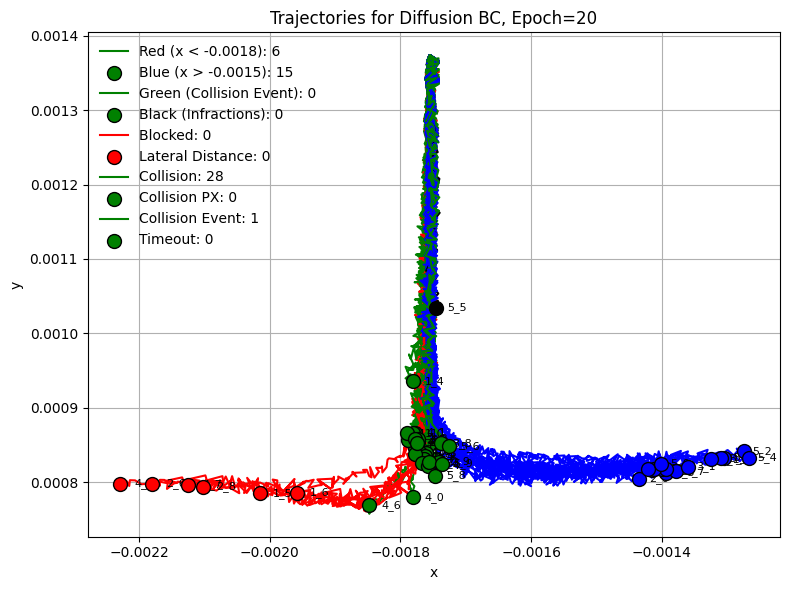

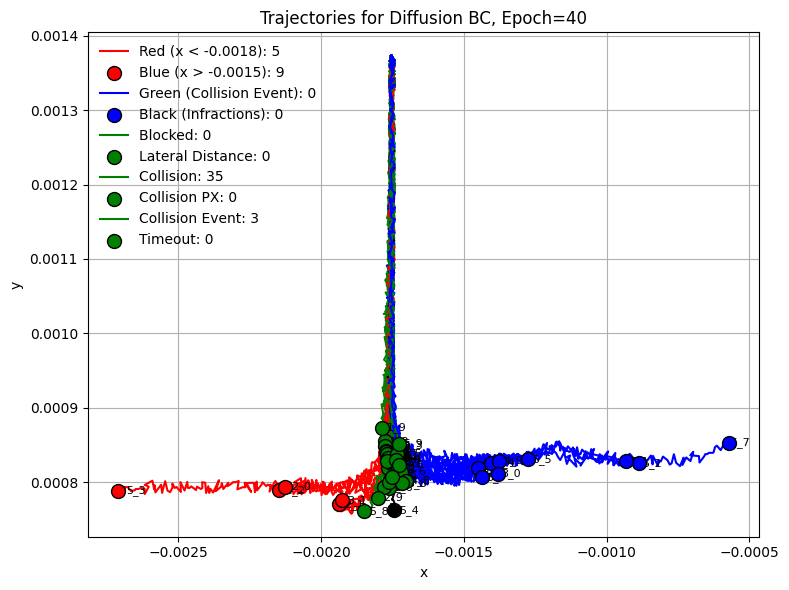

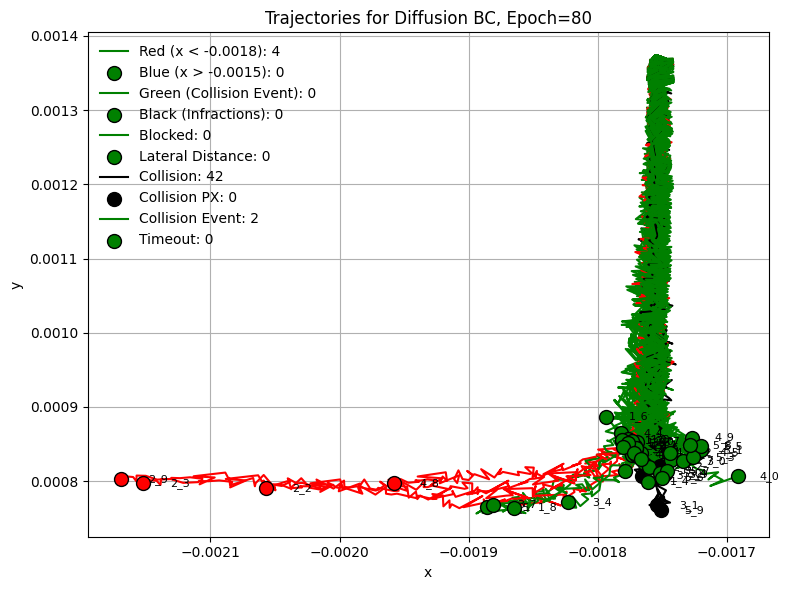

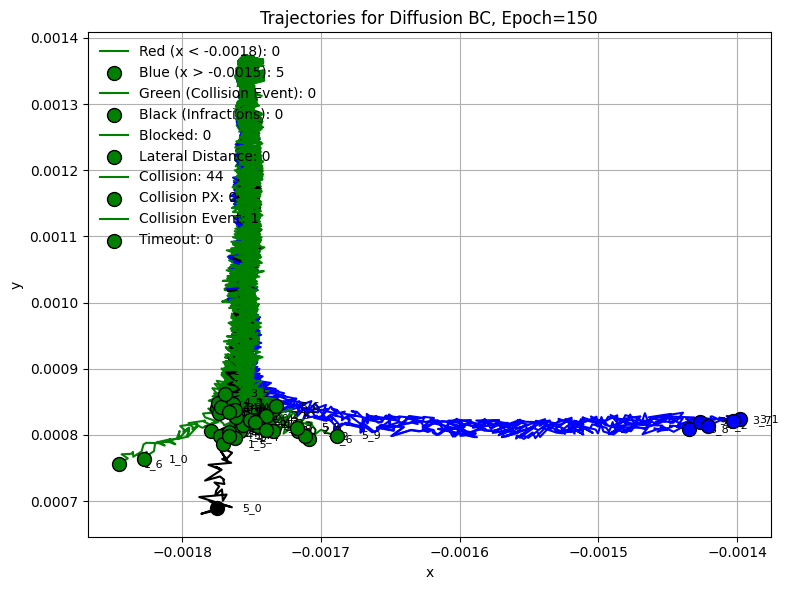

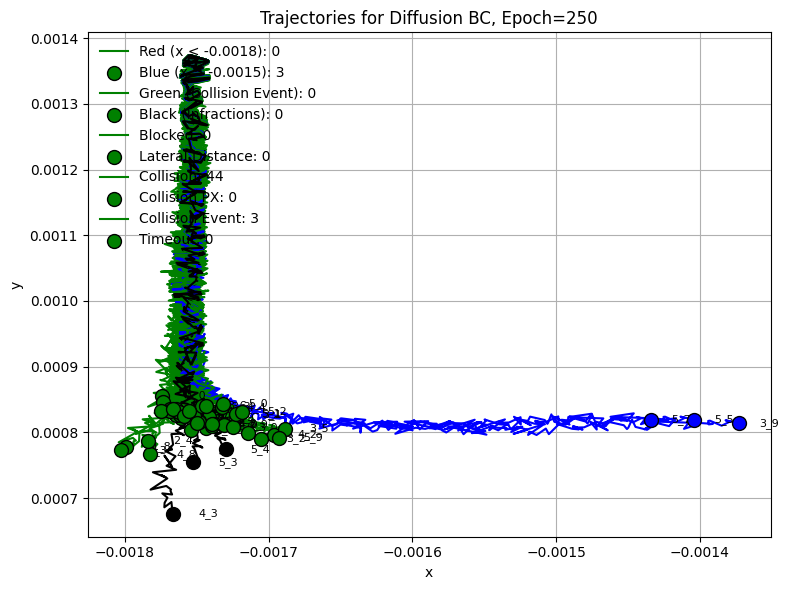

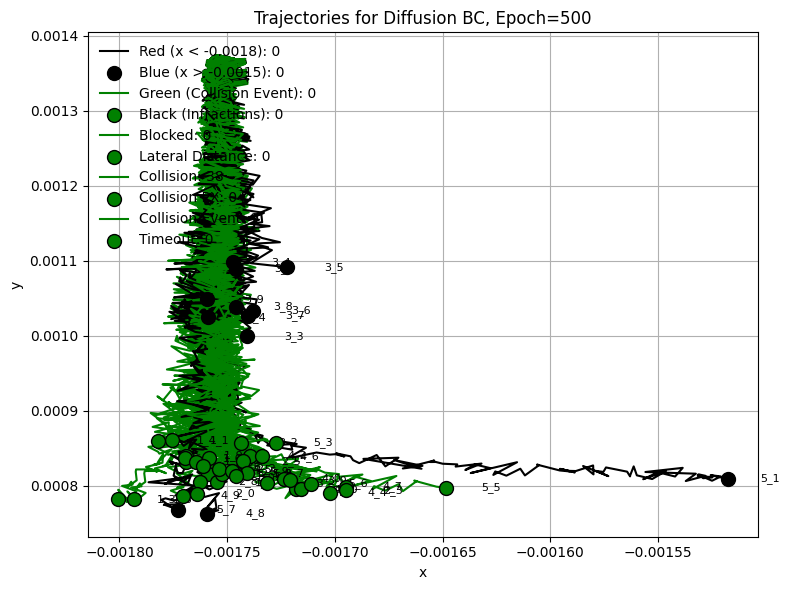

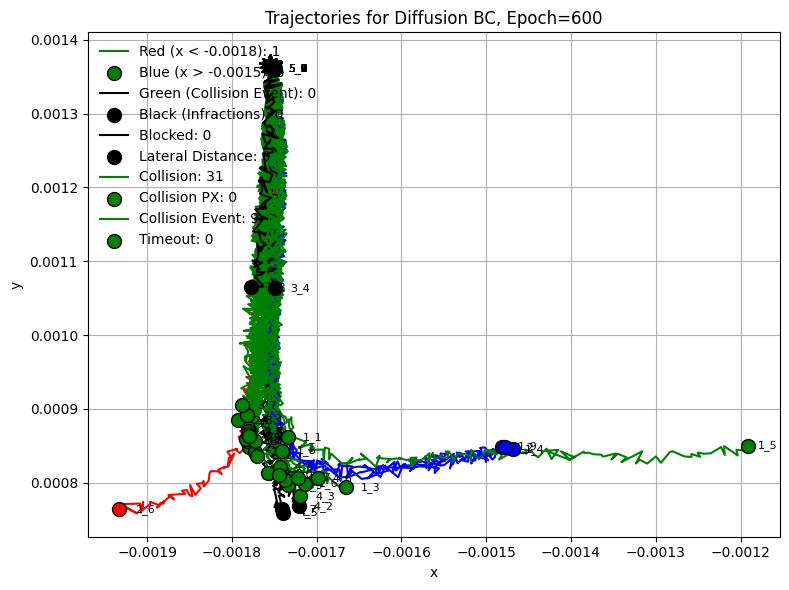

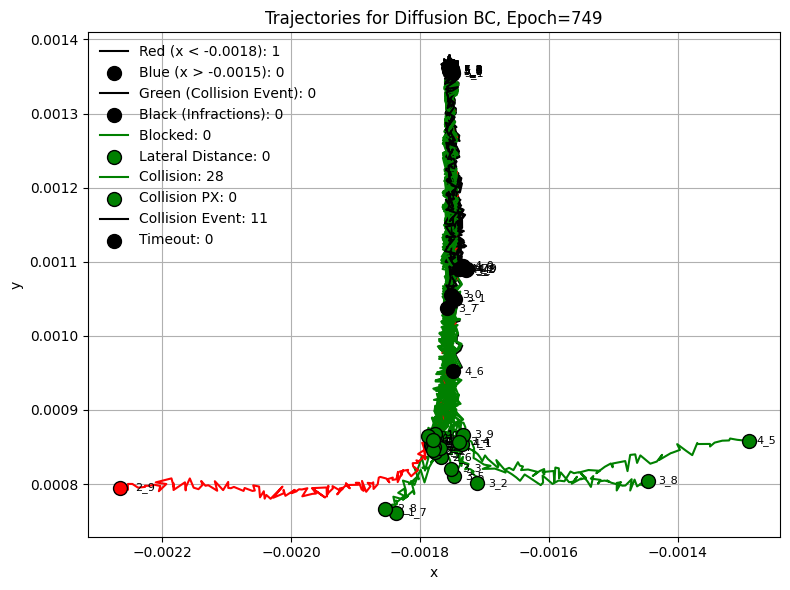

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Função para plotar trajetórias (x, y) agregadas por BC e Ech, interrompendo quando houver infração e marcando o último ponto
def plot_trajectories_by_bc_ech(data):
    # Dicionário para armazenar as trajetórias (x, y) por BC e Ech
    trajectories = defaultdict(lambda: defaultdict(list))

    # Percorrer os dados e agrupar as trajetórias por BC e Ech
    for entry in data:
        BC, M, Ech, Ep, values = entry
        x = values[0]  # x está na primeira coluna
        y = values[1]  # y está na segunda coluna
        
        # Variáveis para verificar infrações
        is_route_completed = values[4]
        c_blocked = values[5]
        c_lat_dist = values[6]
        c_collision = values[7]
        collision = values[8]
        c_collision_px = values[9]
        timeout = values[10]
        
        # Soma das infrações
        c_blocked_sum = sum(c_blocked)
        c_lat_dist_sum = sum(c_lat_dist)
        c_collision_sum = sum(c_collision)
        collision_sum = sum(collision)
        c_collision_px_sum = sum(c_collision_px)
        timeout_sum = sum(timeout)
        
        # Verificar se há infração
        no_infraction = (timeout_sum + collision_sum + c_collision_sum + c_lat_dist_sum + c_blocked_sum) == 0
        
        # Agregar trajetórias por BC e Ech
        trajectories[BC][Ech].append((x, y, no_infraction, c_blocked, c_lat_dist, c_collision, collision, c_collision_px, timeout, M, Ep))
    
    # Gerar os gráficos das trajetórias para cada combinação de BC e Ech, ordenados
    for BC in sorted(trajectories.keys()):  # Ordenar por BC
        for Ech in sorted(trajectories[BC].keys()):  # Ordenar por Ech
            plt.figure(figsize=(8, 6))
            
            # Contadores de trajetórias por cor
            red_count = 0
            blue_count = 0
            black_count = 0
            green_count = 0
            
            # Contadores de tipos de infração
            c_blocked_count = 0
            c_lat_dist_count = 0
            c_collision_count = 0
            collision_count = 0
            c_collision_px_count = 0
            timeout_count = 0
            
            for (x, y, no_infraction, c_blocked, c_lat_dist, c_collision, collision, c_collision_px, timeout, M, Ep) in trajectories[BC][Ech]:
                # Inicializar variável de cor e plot parcial
                plot_until_index = len(x)  # Por padrão, plota até o fim
                
                # Verificar se houve infração para definir a cor
                color = 'black'  # Padrão para preto
                collision_event = False
                
                # Verificar onde ocorre a primeira infração e parar de plotar ali
                for i in range(len(x)):
                    if (c_blocked[i] == 1 or c_lat_dist[i] == 1 or c_collision[i] == 1 or
                        collision[i] == 1 or c_collision_px[i] == 1 or timeout[i] == 1):
                        
                        # Incrementar contadores de infrações
                        if c_blocked[i] == 1:
                            c_blocked_count += 1
                        if c_lat_dist[i] == 1:
                            c_lat_dist_count += 1
                        if c_collision[i] == 1:
                            c_collision_count += 1
                            collision_event = True  # Indicar que ocorreu um evento de colisão
                        if collision[i] == 1:
                            collision_count += 1
                        if c_collision_px[i] == 1:
                            c_collision_px_count += 1
                        if timeout[i] == 1:
                            timeout_count += 1
                        
                        plot_until_index = i  # Parar a trajetória aqui
                        break  # Parar de verificar infrações
                
                if collision_event:
                    color = 'green'
                else:
                    last_x = x[plot_until_index - 1]
                    if last_x < -0.0018:
                        color = 'red'
                        red_count += 1
                    elif last_x > -0.0015:
                        color = 'blue'
                        blue_count += 1
                
                plt.plot(x[:plot_until_index], y[:plot_until_index], color=color)
                
                # Desenhar um círculo no último ponto plotado
                plt.scatter(x[plot_until_index - 1], y[plot_until_index - 1], color=color, edgecolor='k', s=100, zorder=5)
                
                # Adicionar o valor de M ao lado do último ponto
                plt.text(x[plot_until_index - 1]*0.99, y[plot_until_index - 1], f'{M}_{Ep}', fontsize=8, verticalalignment='center')

            if BC == 1:
                plt.title(f'Trajectories for Diffusion BC, Epoch={Ech}')
            else:
                plt.title(f'Trajectories for Standard BC, Epoch={Ech}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.grid(True)
            
            legend_labels = [
                f'Red (x < -0.0018): {red_count}',
                f'Blue (x > -0.0015): {blue_count}',
                f'Green (Collision Event): {green_count}',
                f'Black (Infractions): {black_count}',
                f'Blocked: {c_blocked_count}',
                f'Lateral Distance: {c_lat_dist_count}',
                f'Collision: {c_collision_count}',
                f'Collision PX: {c_collision_px_count}',
                f'Collision Event: {collision_count}',
                f'Timeout: {timeout_count}'
            ]
            plt.legend(legend_labels, loc='upper left', frameon=False)
            
            plt.tight_layout()
            plt.show()

path_to_data_folder = "diff_bc_video_(diffuser)/birdview/town01_multimodality_t_intersection_simples"
data = np.load(path_to_data_folder + '/data.npy', allow_pickle=True)

plot_trajectories_by_bc_ech(data)


## town01_multimodality_t_intersection_simples_2

In [6]:
path_to_data_folder_2 = "diff_bc_video_(diffuser)/birdview/town01_multimodality_t_intersection_simples_2"

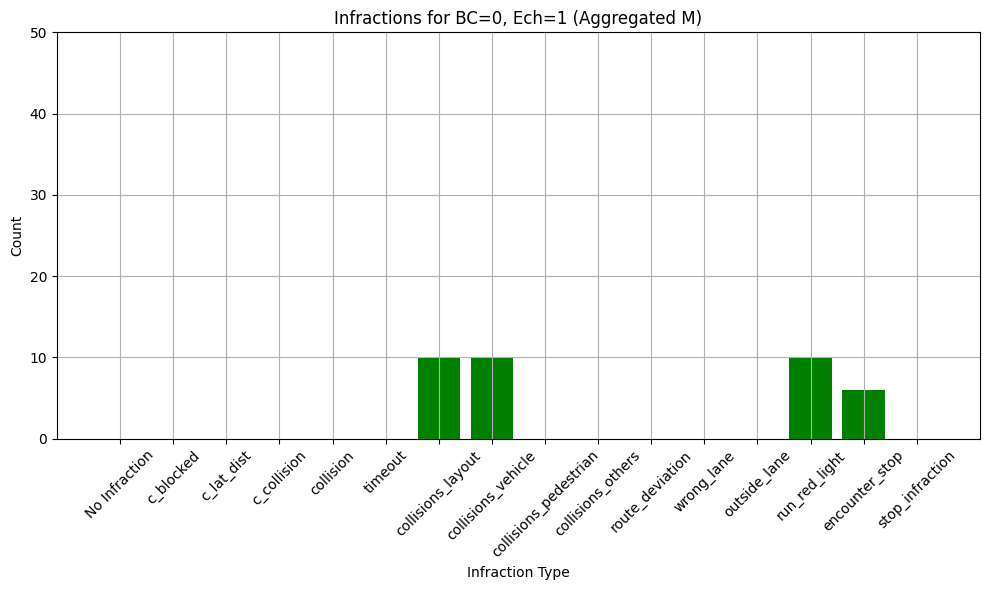

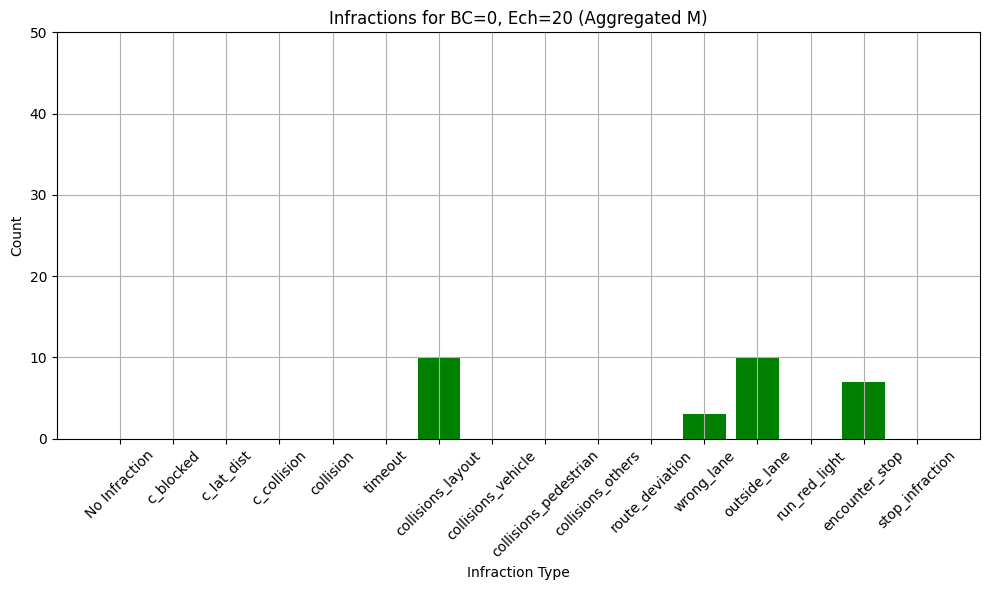

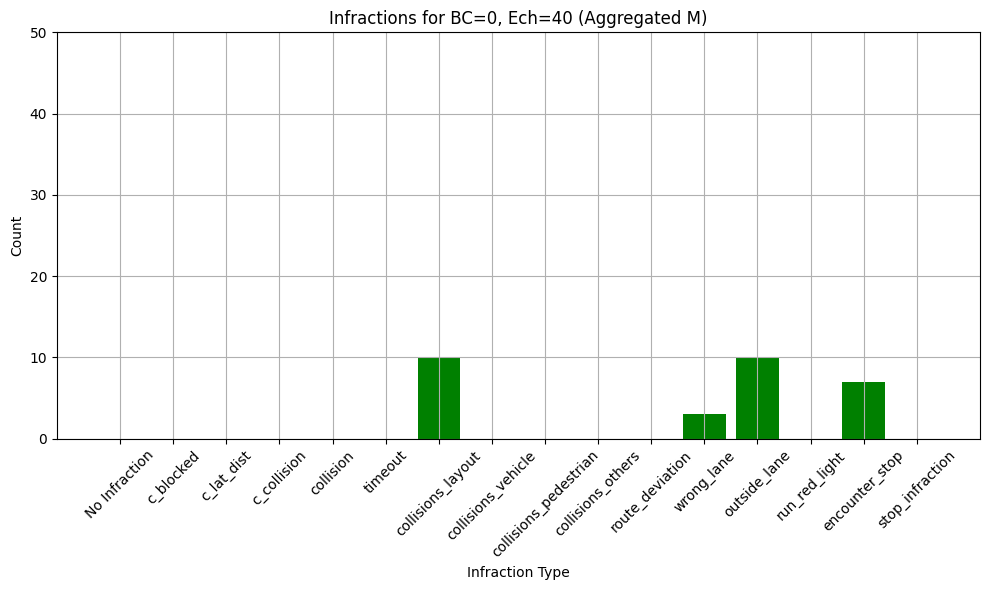

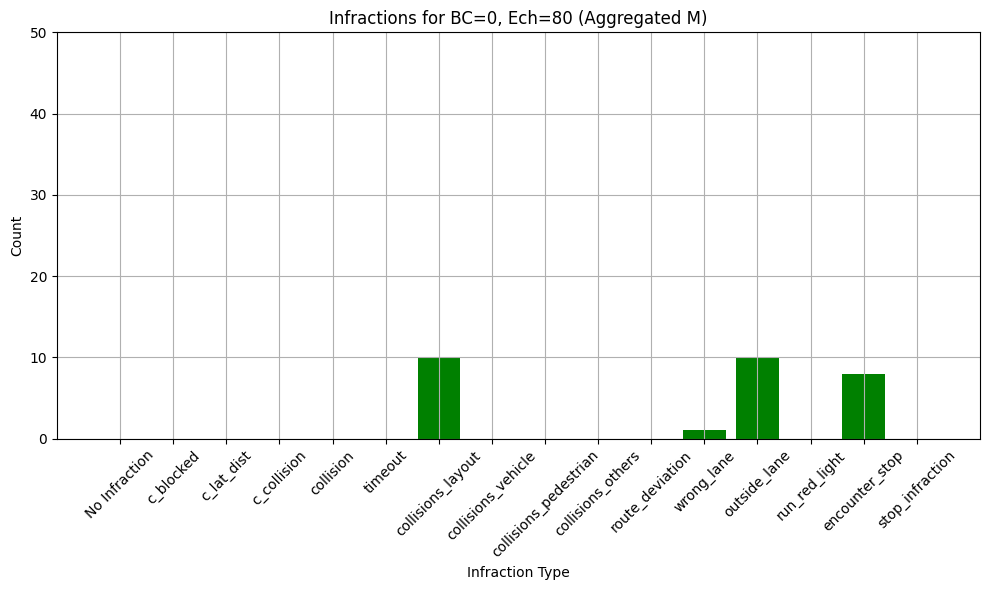

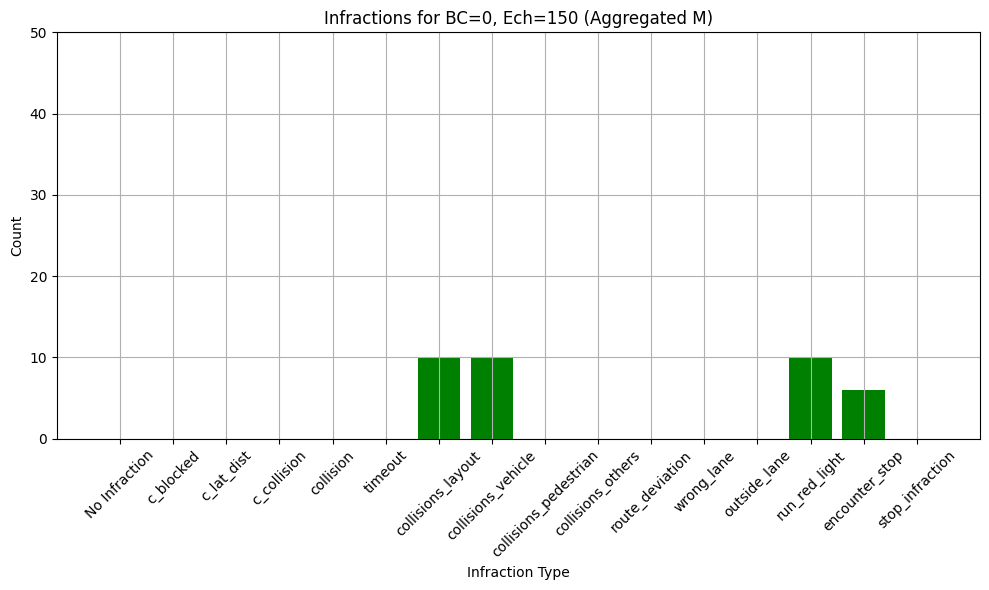

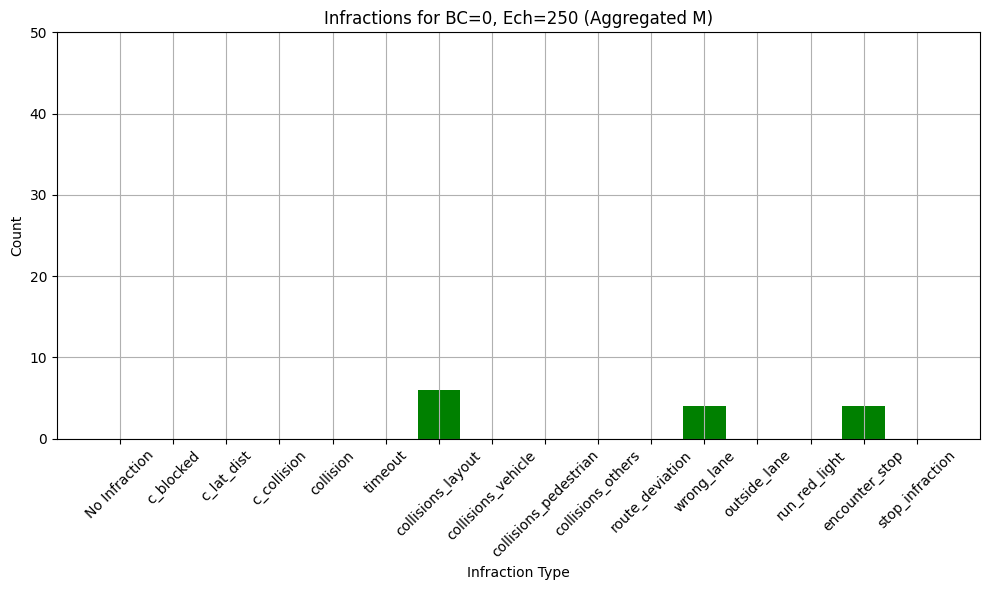

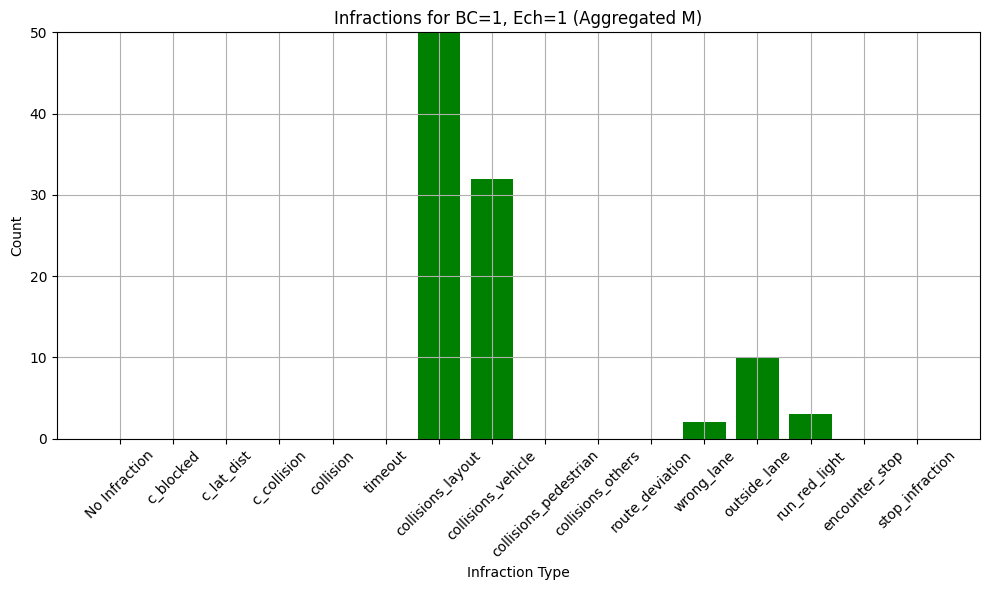

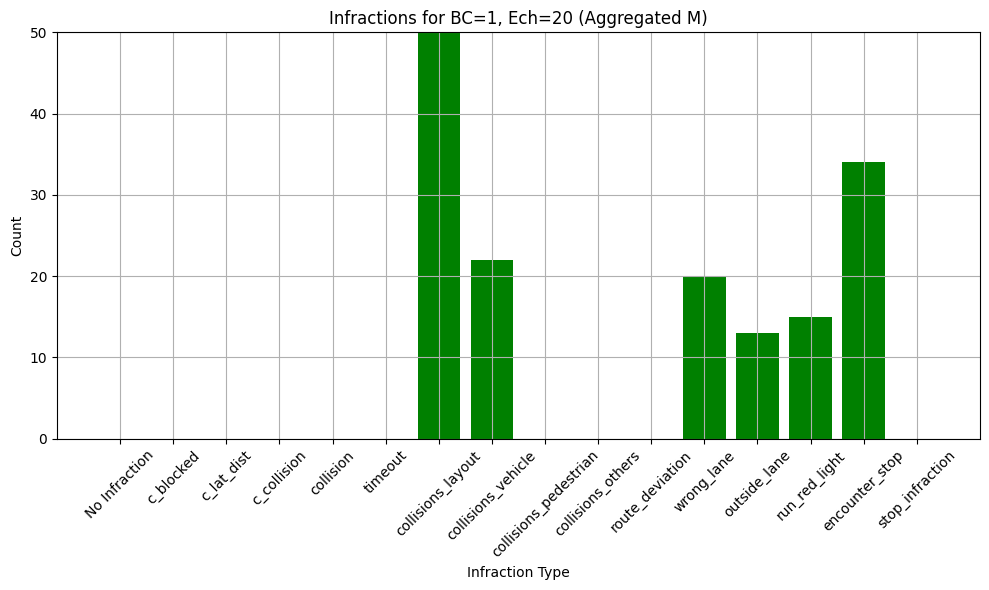

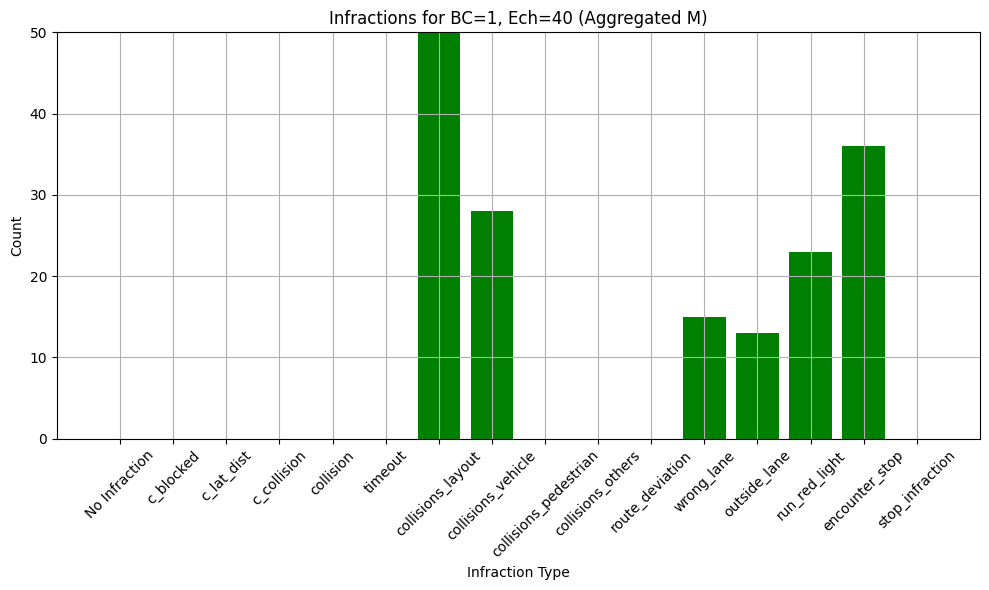

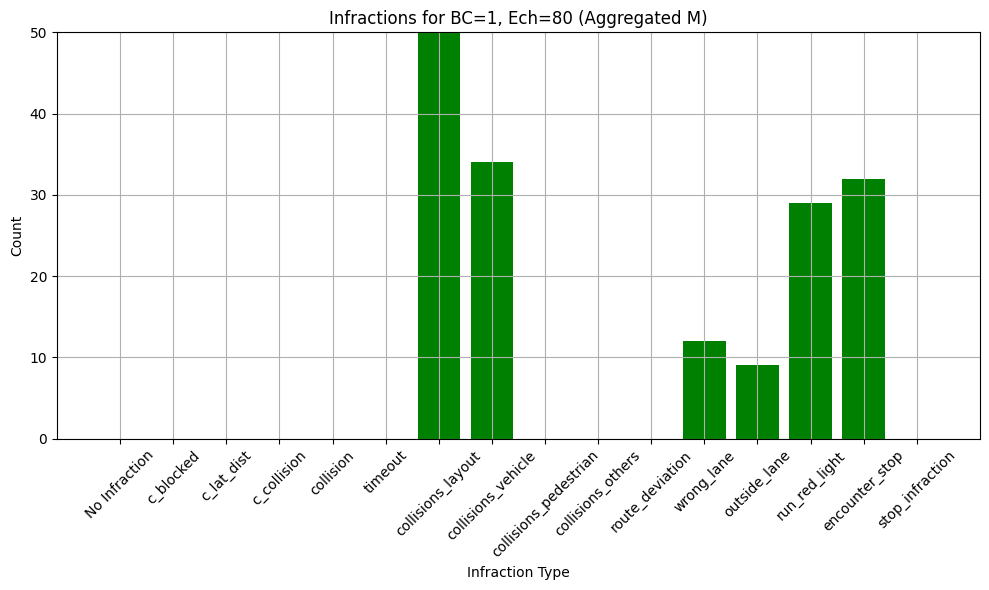

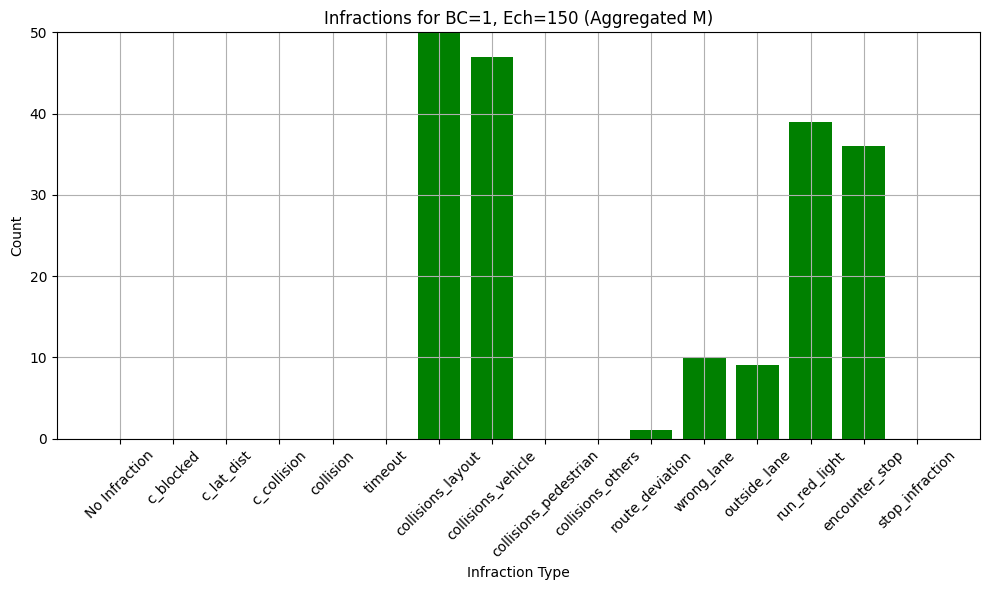

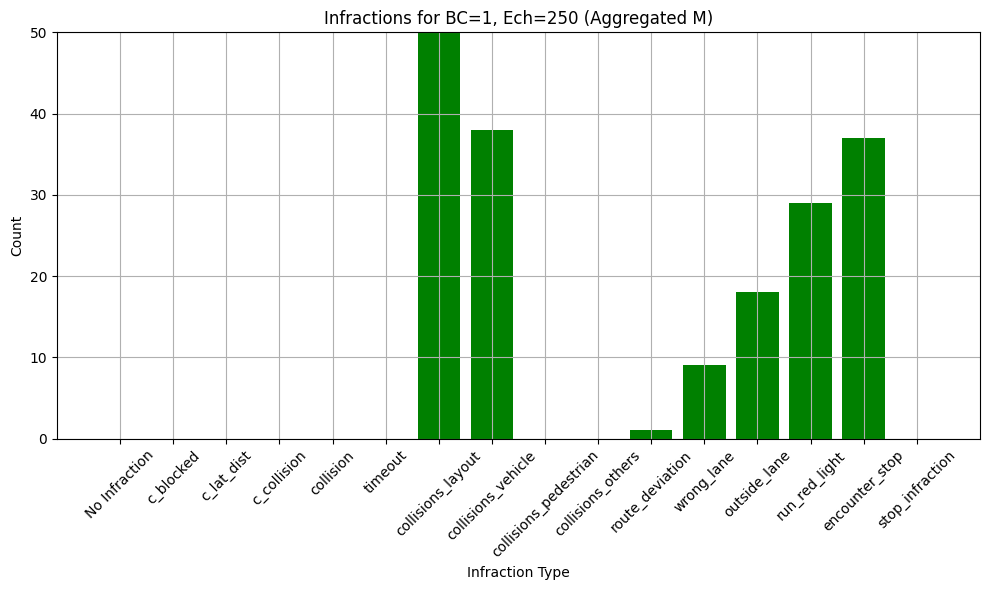

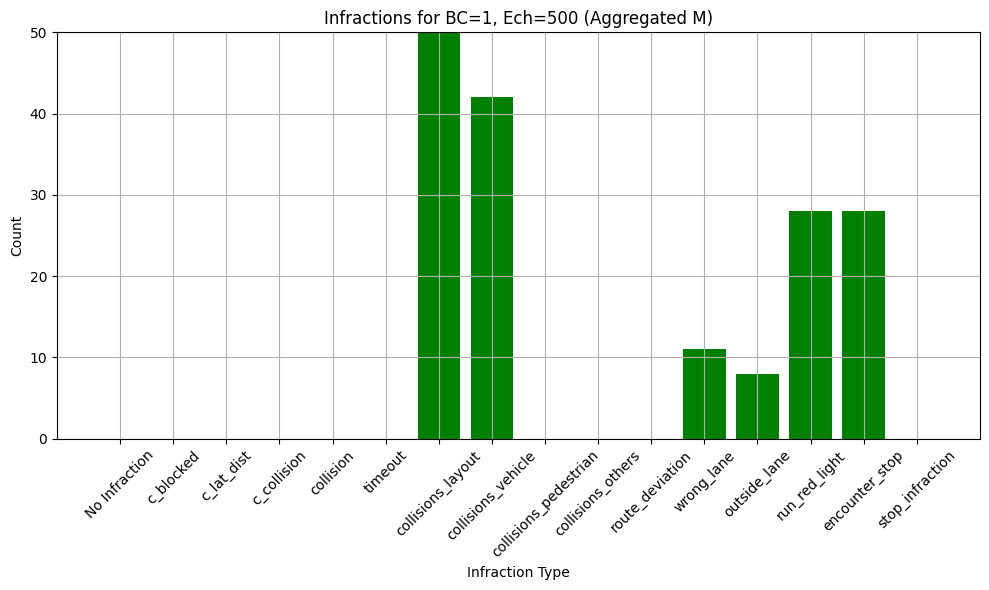

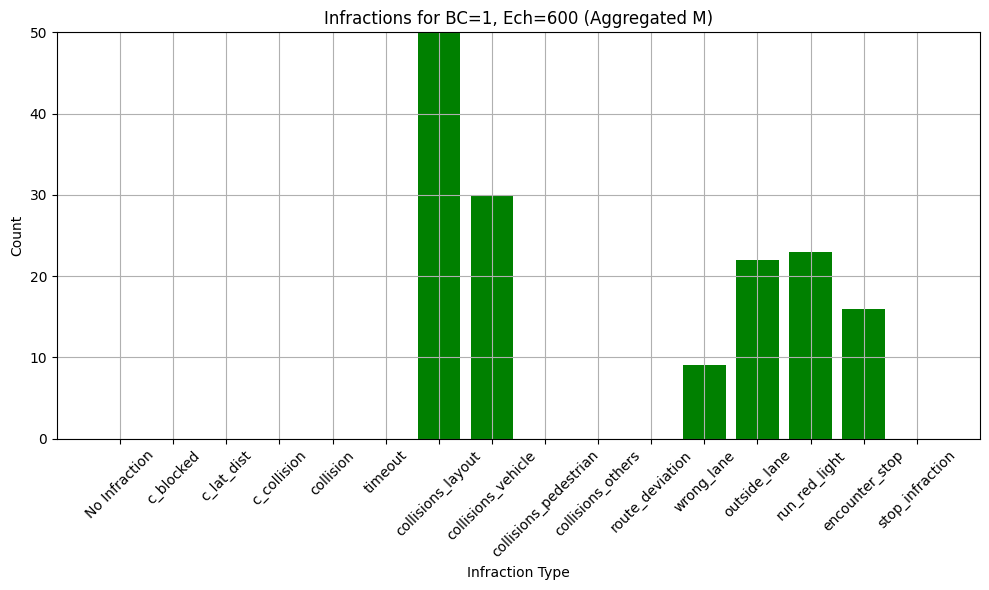

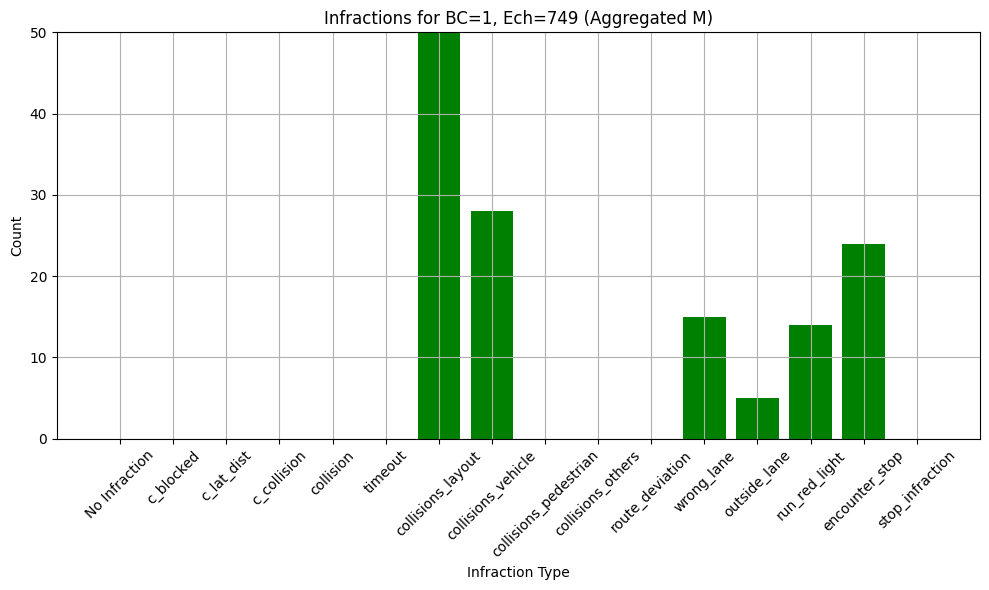

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Função para contar as infrações e plotar os histogramas por BC + Ech
def plot_histograms_by_bc_ech(data):
    # Dicionário para armazenar contagens de infrações por BC e Ech (agregando M)
    infraction_counts = defaultdict(lambda: defaultdict(int))
    
    for entry in data:
        BC, M, Ech, Ep, values = entry
        # print(len(values))
        # Valores de infração
        is_route_completed = values[4]
        c_blocked = values[5]
        c_lat_dist = values[6]
        c_collision = values[7]
        collision = values[8]
        c_collision_px = values[9]
        timeout = values[10]
        collisions_layout = values[14]
        collisions_vehicle = values[15]
        collisions_pedestrian = values[16]
        collisions_others = values[17]
        route_deviation = values[18]
        wrong_lane = values[19]
        outside_lane = values[20]
        run_red_light = values[21]
        encounter_stop = values[22]
        stop_infraction = values[23]

        # Verificar se é uma execução sem infração (todas falsas)
        c_blocked_sum = sum(c_blocked)
        c_lat_dist_sum = sum(c_lat_dist)
        c_collision_sum = sum(c_collision)
        collision_sum = sum(collision)
        c_collision_px_sum = sum(c_collision_px)
        timeout_sum = sum(timeout)
        collisions_layout_sum = sum(collisions_layout)
        collisions_vehicle_sum = sum(collisions_vehicle)
        collisions_pedestrian_sum = sum(collisions_pedestrian)
        collisions_others_sum = sum(collisions_others)
        route_deviation_sum = sum(route_deviation)
        wrong_lane_sum = sum(wrong_lane)
        outside_lane_sum = sum(outside_lane)
        run_red_light_sum = sum(run_red_light)
        encounter_stop_sum = sum(encounter_stop)
        stop_infraction_sum = sum(stop_infraction)
        # print(c_blocked)
        no_infraction = (timeout_sum+c_lat_dist_sum+c_blocked_sum+collisions_layout_sum+collisions_others_sum+route_deviation_sum+wrong_lane_sum+outside_lane_sum) == 0
        
        # Agrupar por BC e Ech
        if no_infraction:
            infraction_counts[(BC, Ech)]['No Infraction'] += 1
        else:
            # Contar cada tipo de infração
            if c_blocked_sum:
                infraction_counts[(BC, Ech)]['c_blocked'] += 1
            if c_lat_dist_sum:
                infraction_counts[(BC, Ech)]['c_lat_dist'] += 1
            # elif c_collision_sum:
            #     infraction_counts[(BC, Ech)]['c_collision'] += 1
            # elif collision_sum:
            #     infraction_counts[(BC, Ech)]['collision'] += 1
            if timeout_sum:
                infraction_counts[(BC, Ech)]['timeout'] += 1
            if collisions_layout_sum:
                infraction_counts[(BC, Ech)]['collisions_layout'] += 1
            if collisions_vehicle_sum:
                infraction_counts[(BC, Ech)]['collisions_vehicle'] += 1
            if collisions_pedestrian_sum:
                infraction_counts[(BC, Ech)]['collisions_pedestrian'] += 1
            if collisions_others_sum:
                infraction_counts[(BC, Ech)]['collisions_others'] += 1
            if route_deviation_sum:
                infraction_counts[(BC, Ech)]['route_deviation'] += 1
            if wrong_lane_sum:
                infraction_counts[(BC, Ech)]['wrong_lane'] += 1
            if outside_lane_sum:
                infraction_counts[(BC, Ech)]['outside_lane'] += 1
            if run_red_light_sum:
                infraction_counts[(BC, Ech)]['run_red_light'] += 1
            if encounter_stop_sum:
                infraction_counts[(BC, Ech)]['encounter_stop'] += 1
            if stop_infraction_sum:
                infraction_counts[(BC, Ech)]['stop_infraction'] += 1

    # Ordenar os histogramas por BC e Ech
    sorted_keys = sorted(infraction_counts.keys())

    # Gerar os histogramas para cada combinação de BC e Ech
    for (BC, Ech) in sorted_keys:
        infractions = infraction_counts[(BC, Ech)]
        # Nome das infrações
        infraction_types = ['No Infraction', 'c_blocked', 'c_lat_dist',
                            'c_collision', 'collision', 'timeout',
                            'collisions_layout', 'collisions_vehicle',
                            'collisions_pedestrian', 'collisions_others',
                            'route_deviation', 'wrong_lane', 'outside_lane',
                            'run_red_light', 'encounter_stop', 'stop_infraction']
        
        # Obter as contagens das infrações
        counts = [infractions[infraction] for infraction in infraction_types]

        # Plotar o histograma
        plt.figure(figsize=(10, 6))
        plt.bar(infraction_types, counts, color='g')
        plt.title(f'Infractions for BC={BC}, Ech={Ech} (Aggregated M)')
        plt.xlabel('Infraction Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.ylim([0,50])
        plt.tight_layout()
        plt.grid()
        plt.show()

# Especificar o caminho do arquivo .npy
data = np.load(path_to_data_folder_2 + '/data.npy', allow_pickle=True)

# Chamar a função para gerar os histogramas agregados por BC e Ech
plot_histograms_by_bc_ech(data)


Infrações:48
{'BC': 0, 'M': 4, 'Ech': 1, 'Ep': 1}
{'BC': 0, 'M': 4, 'Ech': 1, 'Ep': 7}


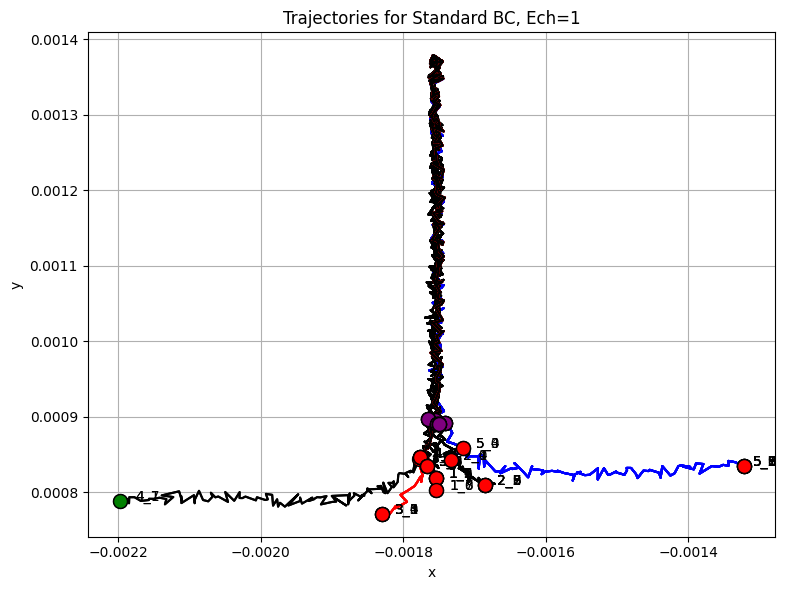

Infrações:50


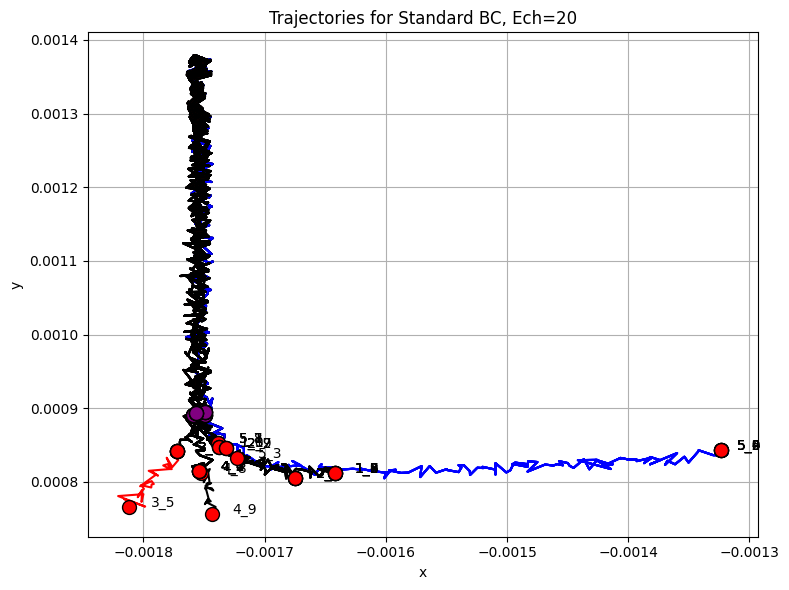

Infrações:50


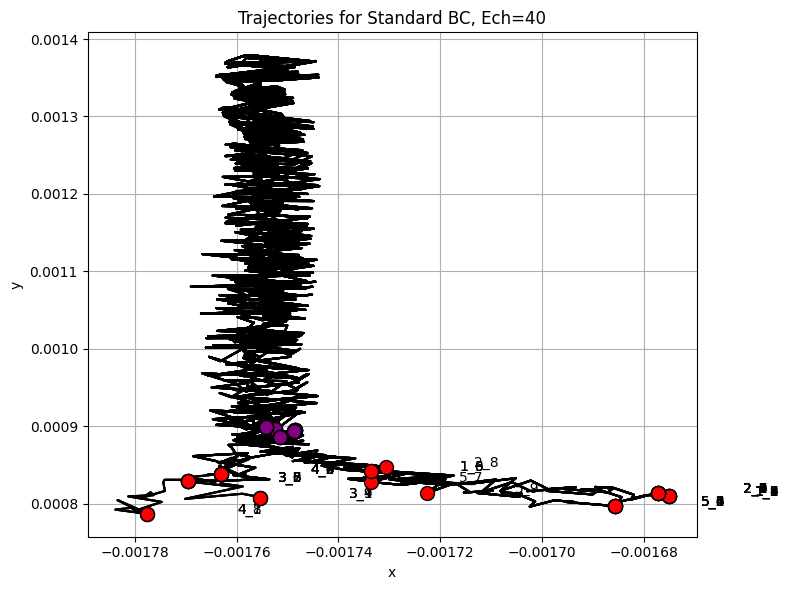

Infrações:40
{'BC': 0, 'M': 3, 'Ech': 80, 'Ep': 4}
{'BC': 0, 'M': 3, 'Ech': 80, 'Ep': 1}
{'BC': 0, 'M': 3, 'Ech': 80, 'Ep': 0}
{'BC': 0, 'M': 3, 'Ech': 80, 'Ep': 3}
{'BC': 0, 'M': 3, 'Ech': 80, 'Ep': 9}
{'BC': 0, 'M': 3, 'Ech': 80, 'Ep': 2}
{'BC': 0, 'M': 3, 'Ech': 80, 'Ep': 5}
{'BC': 0, 'M': 3, 'Ech': 80, 'Ep': 8}
{'BC': 0, 'M': 3, 'Ech': 80, 'Ep': 7}
{'BC': 0, 'M': 3, 'Ech': 80, 'Ep': 6}


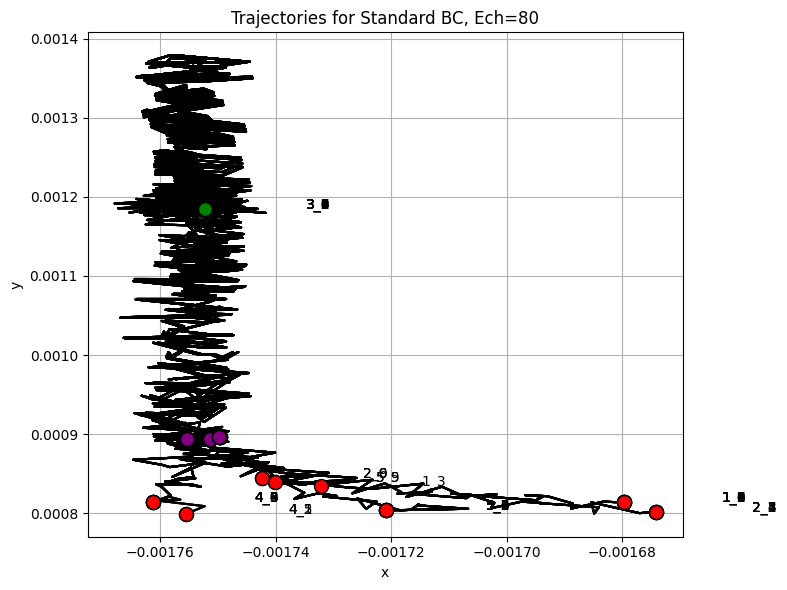

Infrações:40
{'BC': 0, 'M': 5, 'Ech': 150, 'Ep': 8}
{'BC': 0, 'M': 5, 'Ech': 150, 'Ep': 1}
{'BC': 0, 'M': 5, 'Ech': 150, 'Ep': 0}
{'BC': 0, 'M': 5, 'Ech': 150, 'Ep': 3}
{'BC': 0, 'M': 5, 'Ech': 150, 'Ep': 6}
{'BC': 0, 'M': 5, 'Ech': 150, 'Ep': 4}
{'BC': 0, 'M': 5, 'Ech': 150, 'Ep': 2}
{'BC': 0, 'M': 5, 'Ech': 150, 'Ep': 5}
{'BC': 0, 'M': 5, 'Ech': 150, 'Ep': 7}
{'BC': 0, 'M': 5, 'Ech': 150, 'Ep': 9}


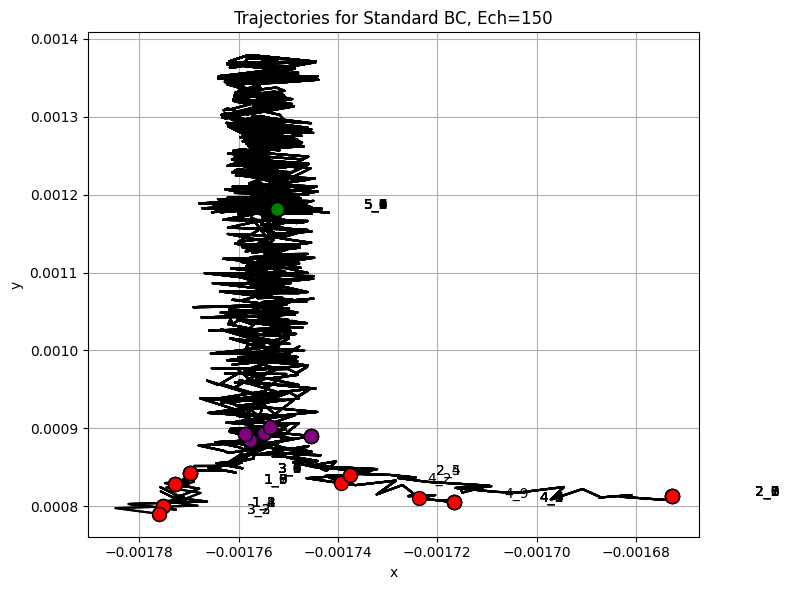

Infrações:47
{'BC': 0, 'M': 1, 'Ech': 250, 'Ep': 8}
{'BC': 0, 'M': 1, 'Ech': 250, 'Ep': 0}
{'BC': 0, 'M': 1, 'Ech': 250, 'Ep': 4}


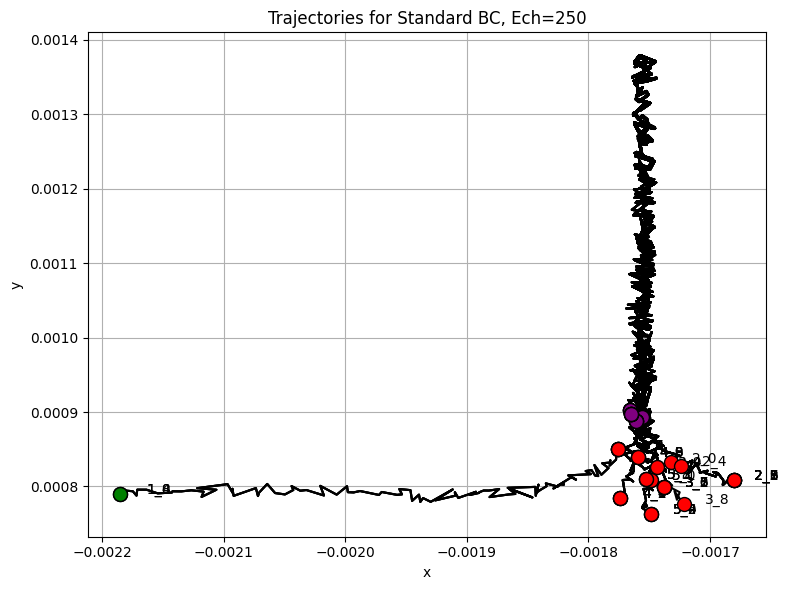

Infrações:50


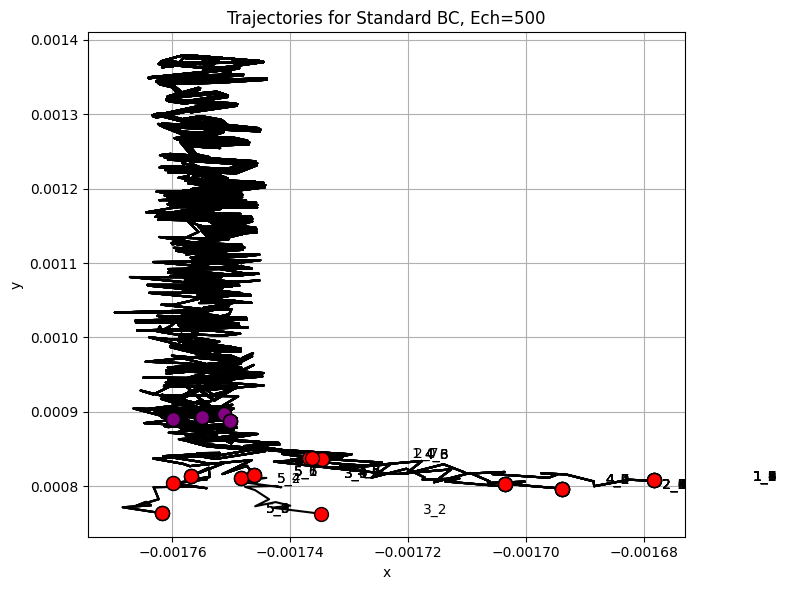

Infrações:50


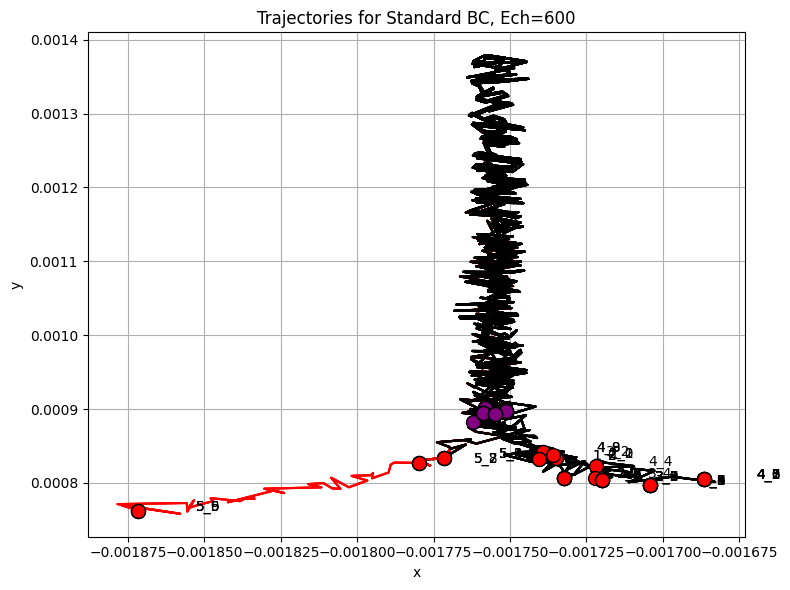

Infrações:50


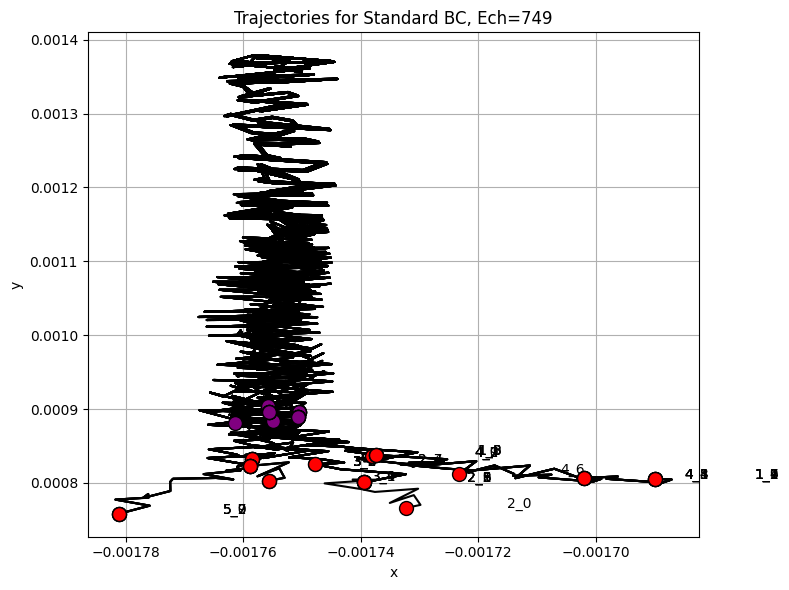

Infrações:40
{'BC': 1, 'M': 5, 'Ech': 1, 'Ep': 9}
{'BC': 1, 'M': 5, 'Ech': 1, 'Ep': 3}
{'BC': 1, 'M': 5, 'Ech': 1, 'Ep': 0}
{'BC': 1, 'M': 5, 'Ech': 1, 'Ep': 5}
{'BC': 1, 'M': 5, 'Ech': 1, 'Ep': 6}
{'BC': 1, 'M': 5, 'Ech': 1, 'Ep': 1}
{'BC': 1, 'M': 5, 'Ech': 1, 'Ep': 7}
{'BC': 1, 'M': 5, 'Ech': 1, 'Ep': 4}
{'BC': 1, 'M': 5, 'Ech': 1, 'Ep': 2}
{'BC': 1, 'M': 5, 'Ech': 1, 'Ep': 8}


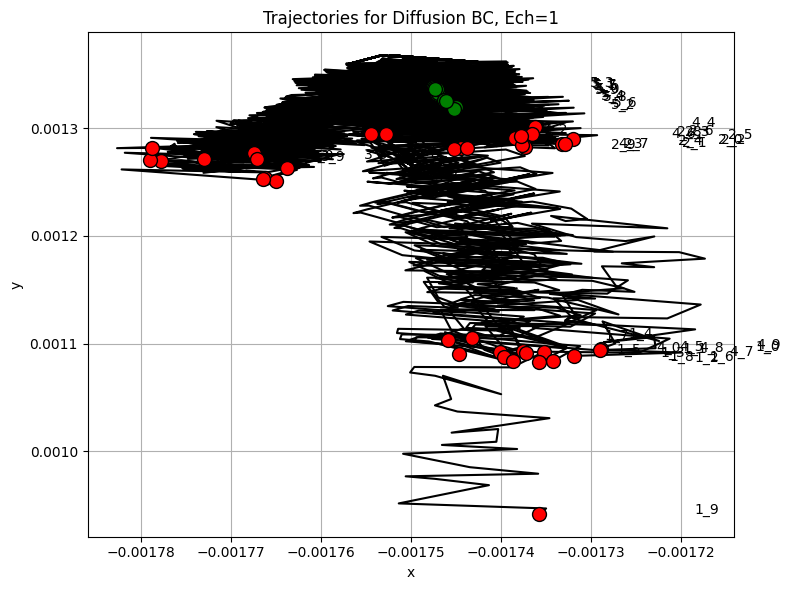

Infrações:46
{'BC': 1, 'M': 2, 'Ech': 20, 'Ep': 4}
{'BC': 1, 'M': 5, 'Ech': 20, 'Ep': 0}
{'BC': 1, 'M': 5, 'Ech': 20, 'Ep': 3}
{'BC': 1, 'M': 5, 'Ech': 20, 'Ep': 6}


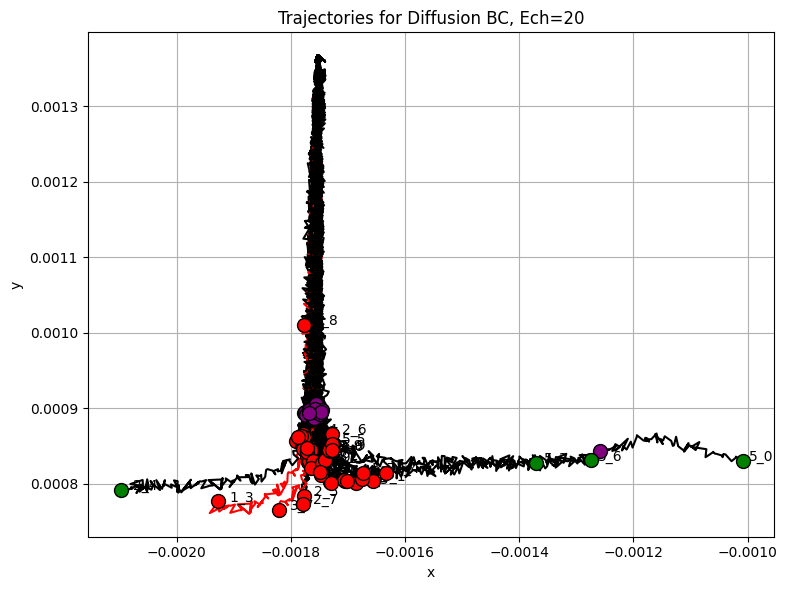

Infrações:45
{'BC': 1, 'M': 4, 'Ech': 40, 'Ep': 3}
{'BC': 1, 'M': 4, 'Ech': 40, 'Ep': 0}
{'BC': 1, 'M': 2, 'Ech': 40, 'Ep': 5}
{'BC': 1, 'M': 5, 'Ech': 40, 'Ep': 9}
{'BC': 1, 'M': 5, 'Ech': 40, 'Ep': 1}


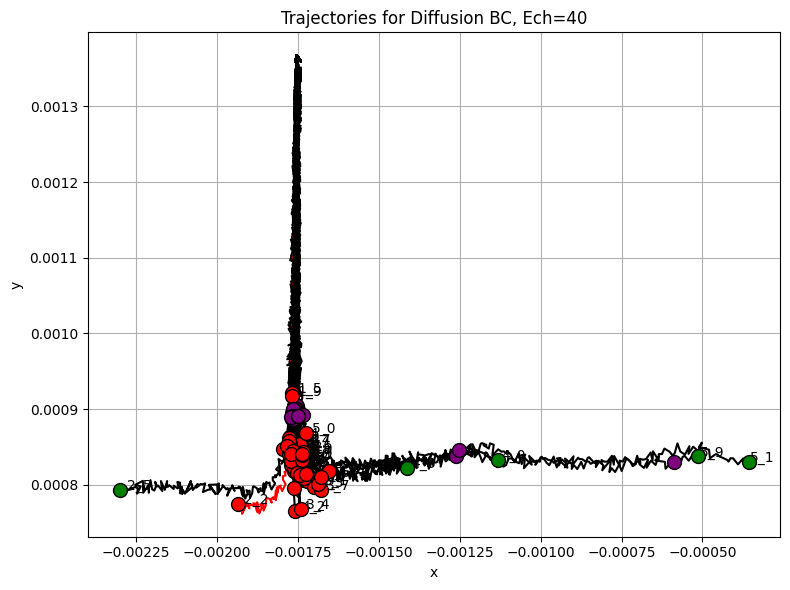

Infrações:49
{'BC': 1, 'M': 4, 'Ech': 80, 'Ep': 5}


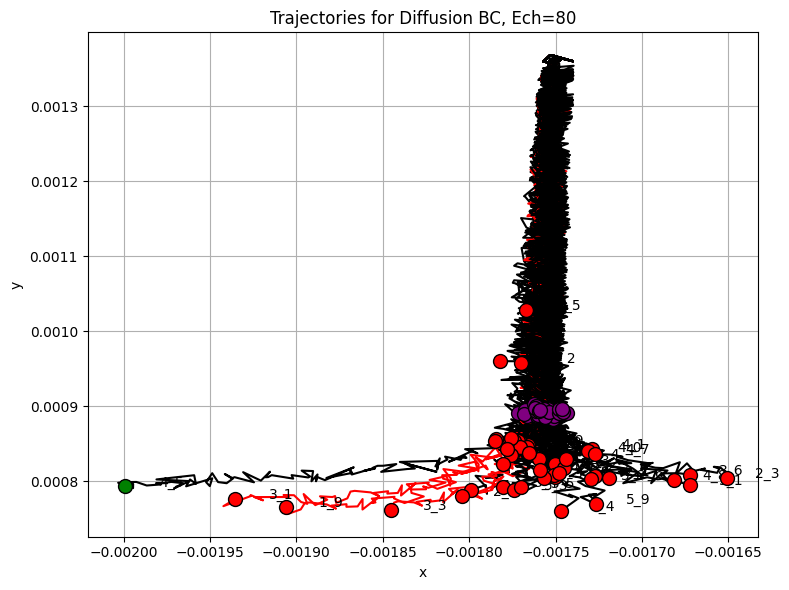

Infrações:50


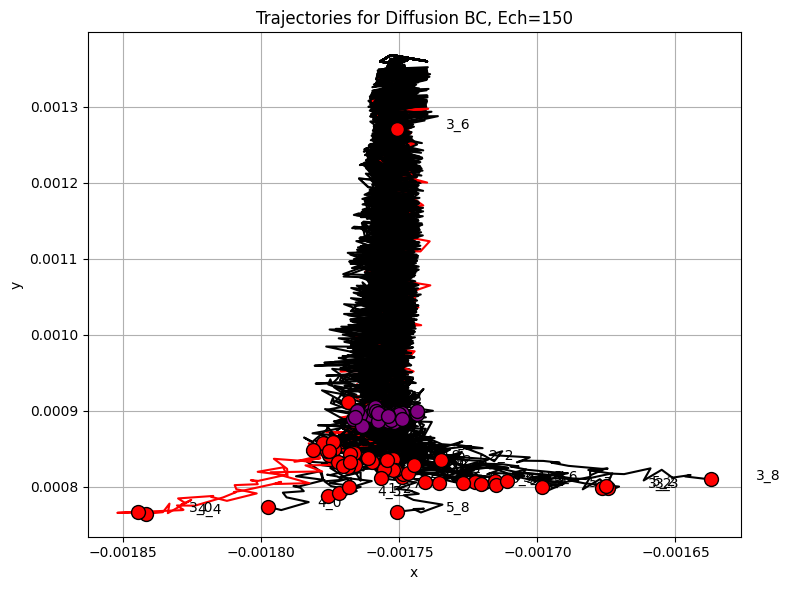

Infrações:50


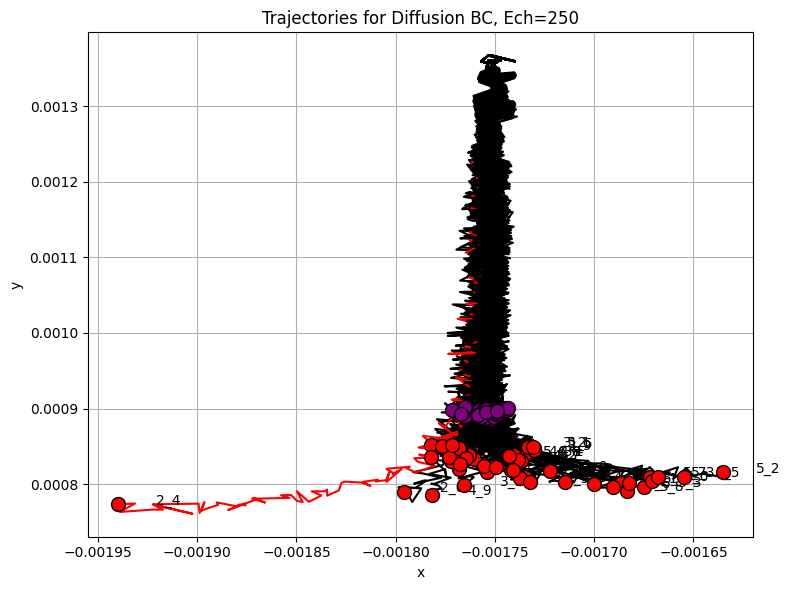

Infrações:46
{'BC': 1, 'M': 5, 'Ech': 500, 'Ep': 1}
{'BC': 1, 'M': 5, 'Ech': 500, 'Ep': 5}
{'BC': 1, 'M': 5, 'Ech': 500, 'Ep': 4}
{'BC': 1, 'M': 5, 'Ech': 500, 'Ep': 6}


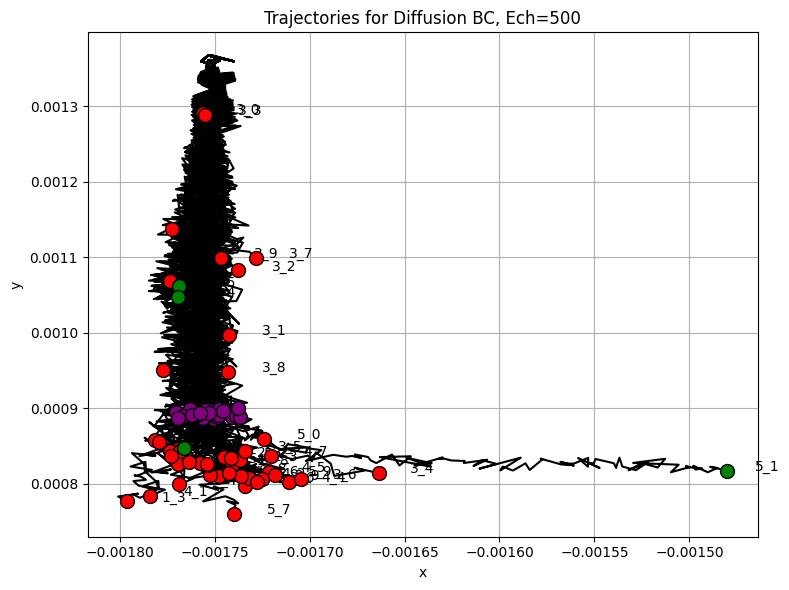

Infrações:38
{'BC': 1, 'M': 1, 'Ech': 600, 'Ep': 7}
{'BC': 1, 'M': 1, 'Ech': 600, 'Ep': 1}
{'BC': 1, 'M': 5, 'Ech': 600, 'Ep': 6}
{'BC': 1, 'M': 5, 'Ech': 600, 'Ep': 7}
{'BC': 1, 'M': 5, 'Ech': 600, 'Ep': 2}
{'BC': 1, 'M': 5, 'Ech': 600, 'Ep': 4}
{'BC': 1, 'M': 5, 'Ech': 600, 'Ep': 8}
{'BC': 1, 'M': 5, 'Ech': 600, 'Ep': 9}
{'BC': 1, 'M': 5, 'Ech': 600, 'Ep': 5}
{'BC': 1, 'M': 5, 'Ech': 600, 'Ep': 1}
{'BC': 1, 'M': 5, 'Ech': 600, 'Ep': 0}
{'BC': 1, 'M': 5, 'Ech': 600, 'Ep': 3}


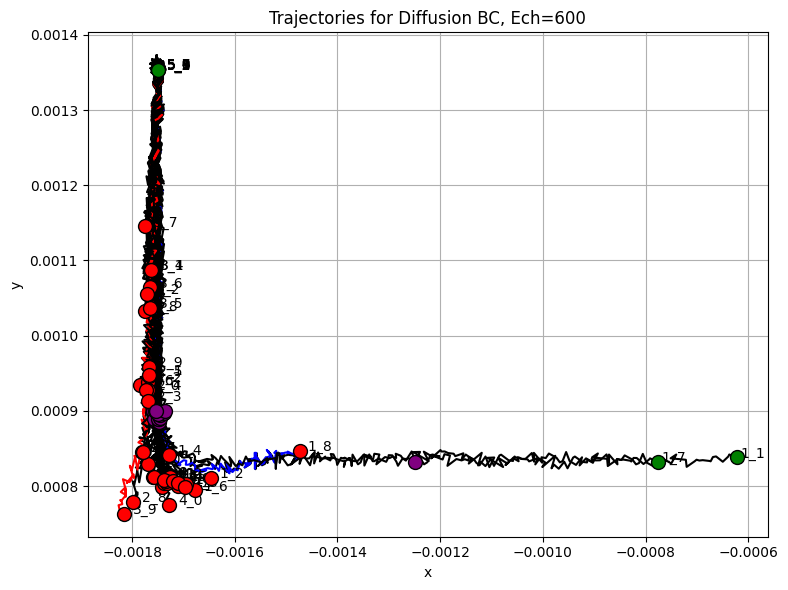

Infrações:38
{'BC': 1, 'M': 2, 'Ech': 749, 'Ep': 7}
{'BC': 1, 'M': 3, 'Ech': 749, 'Ep': 3}
{'BC': 1, 'M': 5, 'Ech': 749, 'Ep': 6}
{'BC': 1, 'M': 5, 'Ech': 749, 'Ep': 2}
{'BC': 1, 'M': 5, 'Ech': 749, 'Ep': 5}
{'BC': 1, 'M': 5, 'Ech': 749, 'Ep': 1}
{'BC': 1, 'M': 5, 'Ech': 749, 'Ep': 8}
{'BC': 1, 'M': 5, 'Ech': 749, 'Ep': 9}
{'BC': 1, 'M': 5, 'Ech': 749, 'Ep': 4}
{'BC': 1, 'M': 5, 'Ech': 749, 'Ep': 7}
{'BC': 1, 'M': 5, 'Ech': 749, 'Ep': 3}
{'BC': 1, 'M': 5, 'Ech': 749, 'Ep': 0}


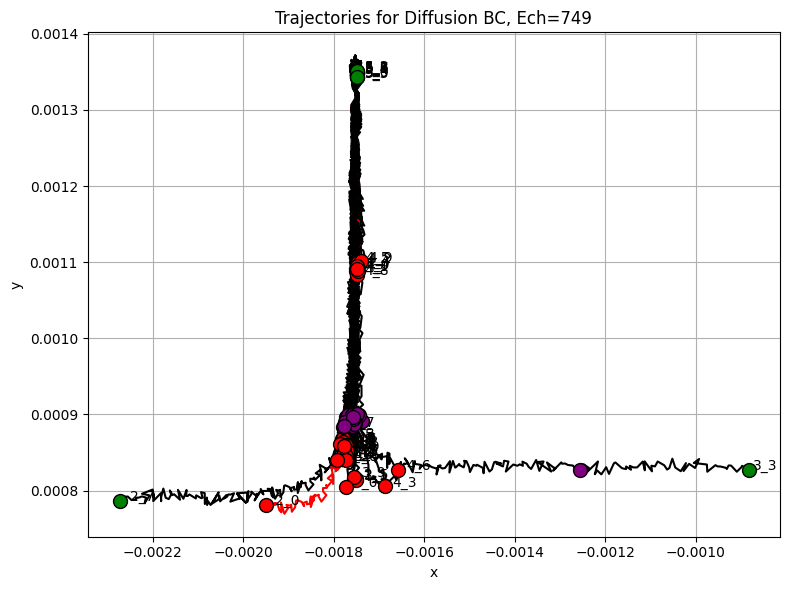

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Função para plotar trajetórias (x, y) agregadas por BC e Ep
def plot_trajectories_by_bc_ep(data):
    # Dicionário para armazenar as trajetórias (x, y) por BC e Ep
    trajectories = defaultdict(lambda: defaultdict(list))

    # Percorrer os dados e agrupar as trajetórias por BC e Ep
    for entry in data:
        BC, M, Ech, Ep, values = entry
        x = values[0]  # x está na primeira coluna
        y = values[1]  # y está na segunda coluna
        
        # Variáveis para verificar infrações
        stop_infraction = values[24]
        encounter_stop = values[23]
        run_red_light = values[22]
        outside_lane = values[21]
        wrong_lane = values[20]
        collisions_layout = values[15]
        collisions_vehicle = values[16]
        collisions_pedestrian = values[17]
        c_blocked = values[6]
        c_lat_dist = values[7]
        c_collision = values[8]
        collision = values[9]
        c_collision_px = values[10]
        timeout = values[11]

        # Agregar trajetórias por BC e Ep
        trajectories[BC][Ech].append((x, y, M, Ep, stop_infraction, encounter_stop, run_red_light, outside_lane, wrong_lane, collisions_pedestrian, 
                                     collisions_layout, collisions_vehicle, c_blocked, c_lat_dist, c_collision, collision, c_collision_px, timeout))

    for BC in sorted(trajectories.keys()):  # Ordenar por BC
        for Ech in sorted(trajectories[BC].keys()):  # Ordenar por Ep
            plt.figure(figsize=(8, 6))
            
            # Contadores de trajetórias por cor
            red_count = 0
            blue_count = 0
            green_count = 0
            black_count = 0
            total_count = 0
            purple_marker_count = 0  # Contador para bolinhas roxas
            green_dict_list = []

            for (x, y, M, Ep, stop_infraction, encounter_stop, run_red_light, outside_lane, wrong_lane, collisions_pedestrian, collisions_layout, collisions_vehicle, 
                 c_blocked, c_lat_dist, c_collision, collision, c_collision_px, timeout) in trajectories[BC][Ech]:
                
                total_count += 1

                color = 'black'  # Padrão inicial

                purple_marker = None  # Para armazenar o índice onde ocorre infração específica

                # Verificar as infrações e definir cores conforme o comportamento anterior
                for i in range(len(x)):
                    if stop_infraction[i] == 1 or encounter_stop[i] == 1 or run_red_light[i] == 1 or collisions_pedestrian[i] == 1:
                        purple_marker = i  # Guardar o índice para desenhar a bolinha roxa

                    # Se ocorrer infrações fora do grupo, interromper a trajetória
                    if c_blocked[i] == 1 or c_lat_dist[i] == 1 or collisions_layout[i] == 1 or timeout[i]== 1 or outside_lane[i]==1 or wrong_lane[i]==1:
                        plot_until_index = i
                        # print("hi")
                        color_marker = 'red'
                        break

                if sum(c_blocked) + sum(c_lat_dist) + sum(collisions_layout) + sum(timeout) + sum(outside_lane) + sum(wrong_lane) == 0:
                    plot_until_index = len(x)
                    color_marker = 'green'
                    green_count += 1
                    green_dict_list.append({'BC': BC, 'M': M, 'Ech': Ech, 'Ep': Ep})

                # Definir a cor da trajetória
                last_x = x[plot_until_index - 1]
                if last_x < -0.0018 and color_marker != 'green':
                    color = 'red'
                    red_count += 1
                elif last_x > -0.0015 and color_marker != 'green':
                    color = 'blue'
                    blue_count += 1
                else:
                    black_count += 1

                # if color == 'red' or color == 'blue' and i >= len(x) - 1:
                #     color_marker = 'green'

                # Plotar a trajetória
                plt.plot(x[:plot_until_index], y[:plot_until_index], color=color)

                plt.scatter(x[plot_until_index - 1], y[plot_until_index - 1], color=color_marker, edgecolor='k', s=100, zorder=5)
                # print(f'{M}_{int(Ep)}')
                plt.text(x[plot_until_index - 1] * 0.99, y[plot_until_index - 1], f'{M}_{int(Ep)}', fontsize=10)

                if purple_marker is not None:
                    plt.scatter(x[purple_marker], y[purple_marker], color='purple', edgecolor='k', s=100, zorder=5)
                    purple_marker_count += 1

            # Título e etiquetas
            if BC == 1:
                plt.title(f'Trajectories for Diffusion BC, Ech={Ech}')
            else:
                plt.title(f'Trajectories for Standard BC, Ech={Ech}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.grid(True)
            
            # Legenda
            legend_labels = [
                f'Total: {total_count}',
                f'Red (x < -0.0018): {red_count}',
                f'Blue (x > -0.0015): {blue_count}',
                f'Black (Collision Event): {black_count}',
                f'Green (No Infractions): {green_count}',
                f'Purple Marker (Specific Infractions): {purple_marker_count}'
            ]
            print('Infrações:' + str(50 - (green_count)))
            [print(ele) for ele in green_dict_list]
            # print(green_dict_list)
            
            plt.tight_layout()
            plt.show()

# Caminho para os dados e chamada da função
# path_to_data_folder = "path_to_your_data_folder"
path_to_data_folder_2 = "diff_bc_video_(diffuser)/birdview/town01_multimodality_t_intersection_simples_2"
data = np.load(path_to_data_folder_2 + '/data_3.npy', allow_pickle=True)

plot_trajectories_by_bc_ep(data)


In [ ]:
- Número de infrações
